# <center><font color = darkgreen> Housing Data Project in AMES CIS 512

### <center> <font color = darkblue> By Vipul Arora
### <center> <font color = darkblue> July 18, 2023

### <font color = maroon> Historical housing data provides comprehensive information on sold houses from 1872 to 2010, encompassing 81 essential features such as area, zoning, building type, basement and garage features, year built, year sold, sale price, and more. 
###  <font color = maroon>  This vast dataset plays a crucial role in the real estate industry as it allows us to analyze the fluctuation of sales prices over time and identify the specific features or categories that have influenced these price changes. By studying this data, we can gain valuable insights into the dynamics of the housing market and make informed predictions about future sales prices for these properties.

 ### <font color = darkblue> Loading the Libraries and data :-

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from word2number import w2n
from tqdm import tqdm

#Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns', None)

In [2]:
housing =  pd.read_csv('Historical Data.csv')

In [3]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
housing.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [5]:
housing.shape

(1460, 81)

In [6]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
list(housing.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [9]:
for x in housing.columns:
    print (x)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [10]:
housing.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [11]:
housing.describe(include='object').T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType      588      3  BrkFace   445
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

### <font color = darkblue> Finding the number of null values, D-type for every column :-

In [12]:
housing.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
housing.isnull().any().sum()

19

### <font color = darkblue>Calculating Percentage of null values :-

In [14]:
null_columns=housing.columns[housing.isnull().any()] #shows columns with null values
housing[null_columns].isnull().sum()*100/len(housing) # percentage of null values

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [15]:
Missing_features=[features for features in housing.columns if housing[features].isnull().sum()>1]

In [16]:
Missing_features

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

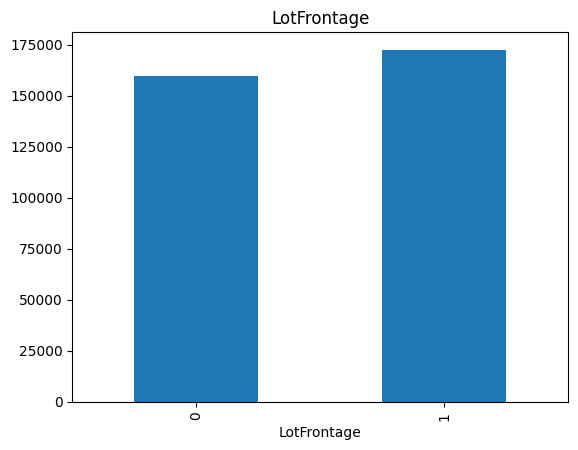

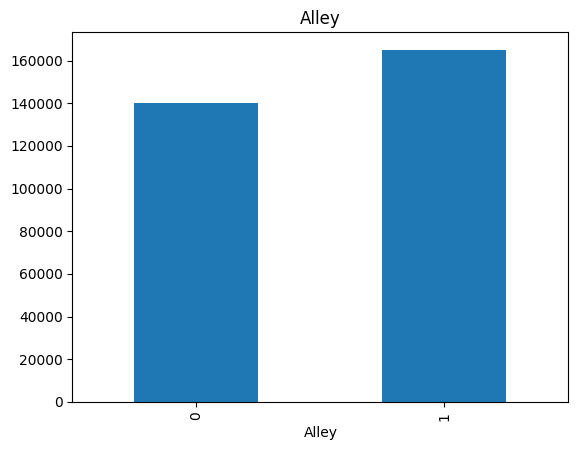

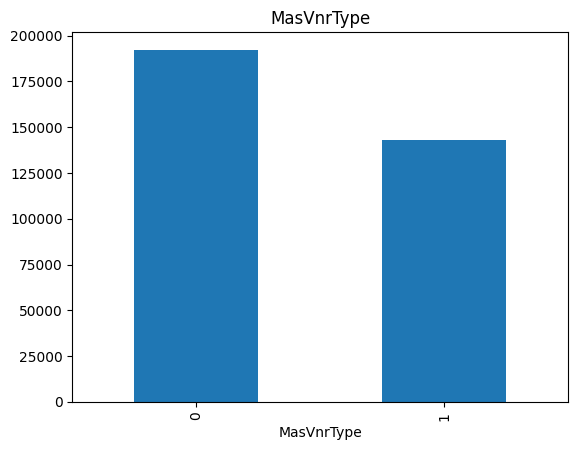

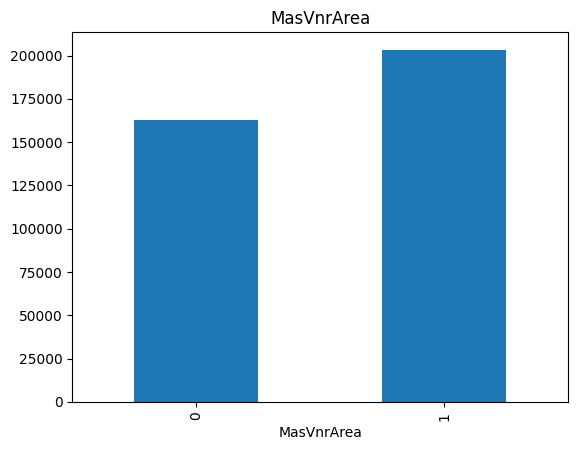

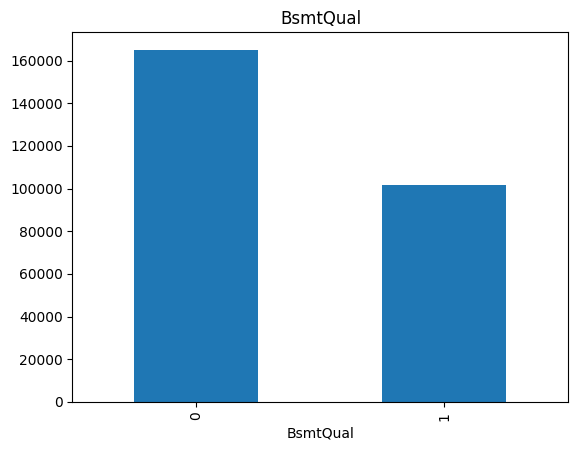

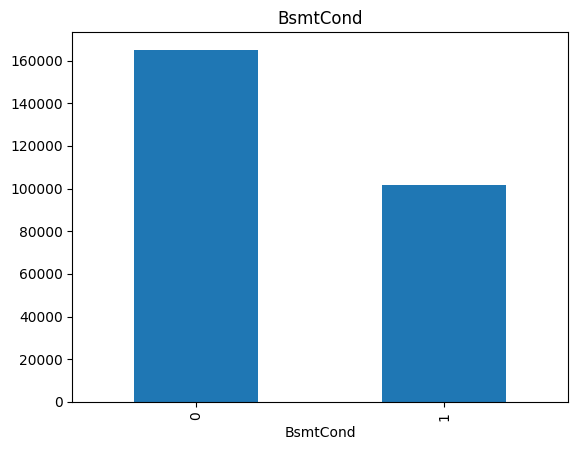

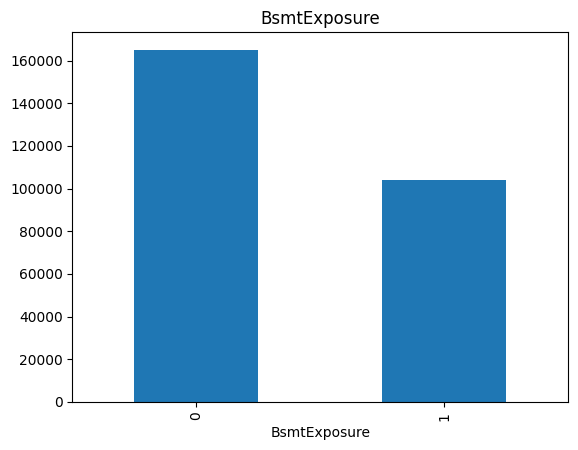

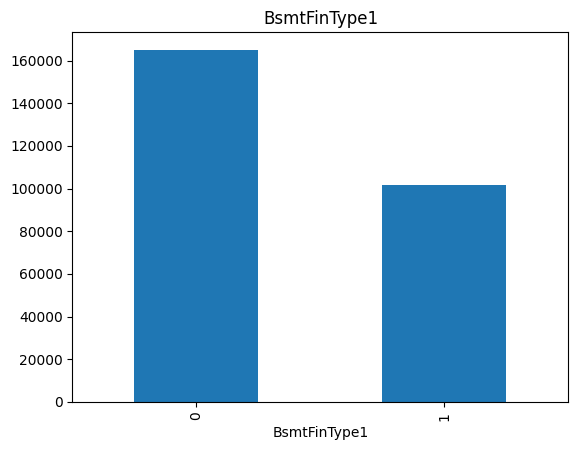

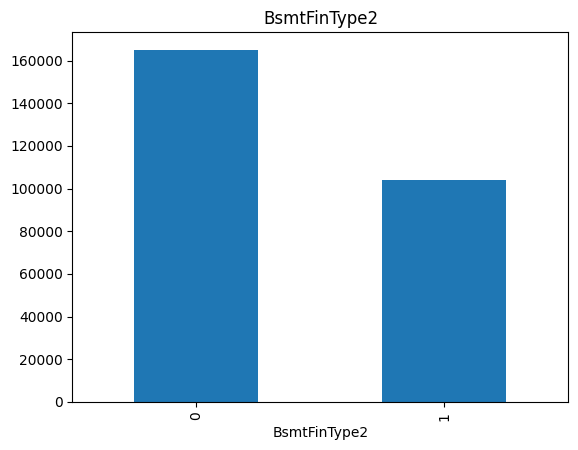

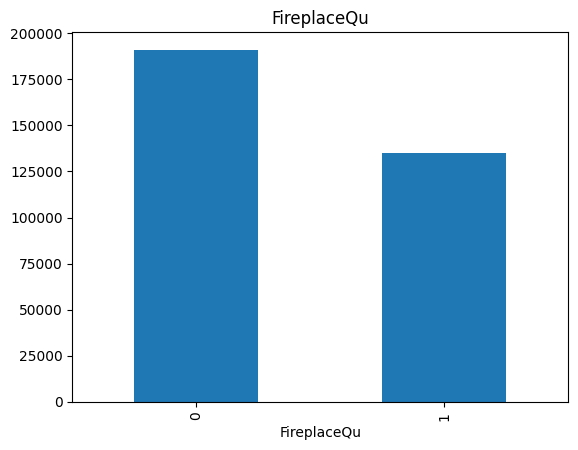

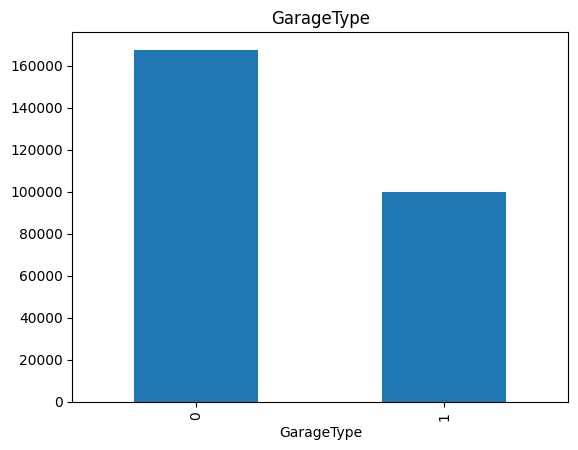

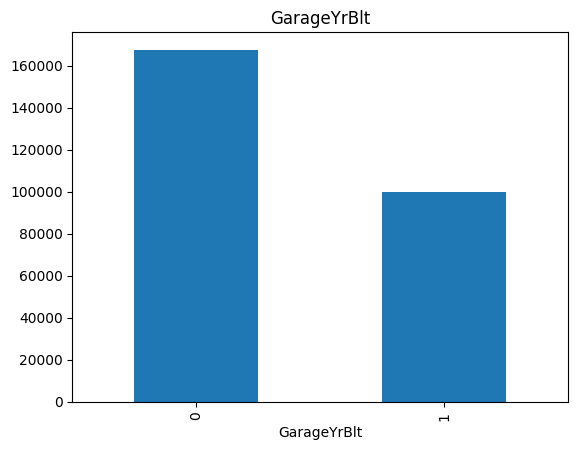

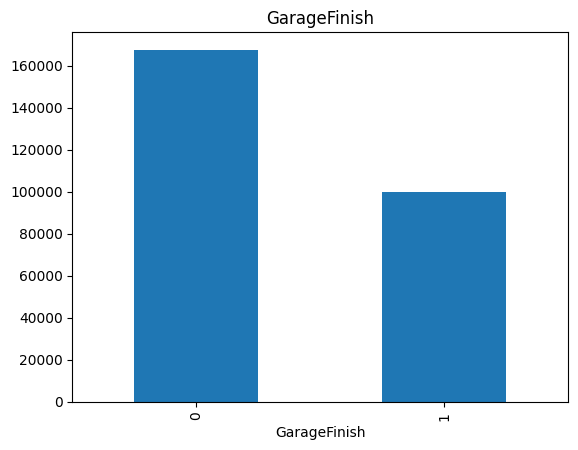

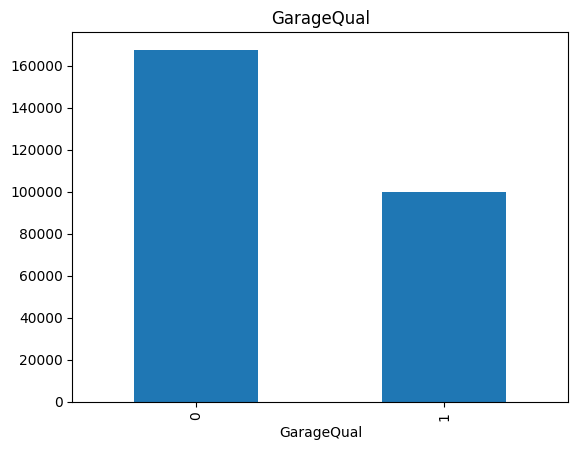

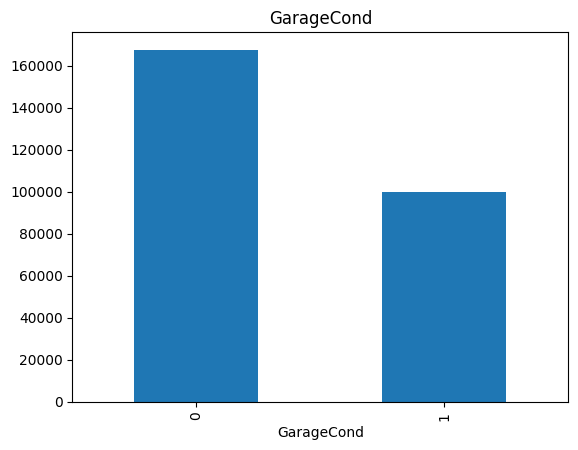

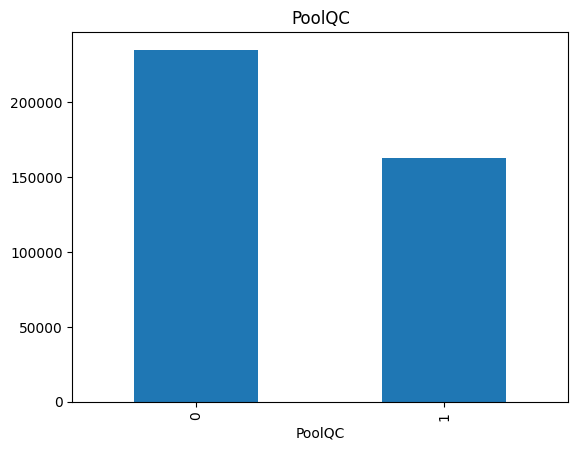

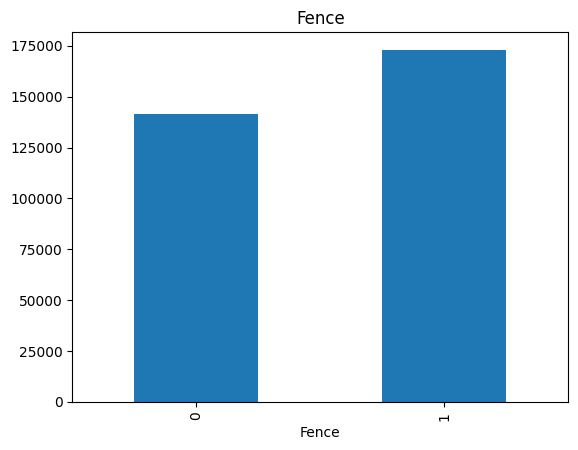

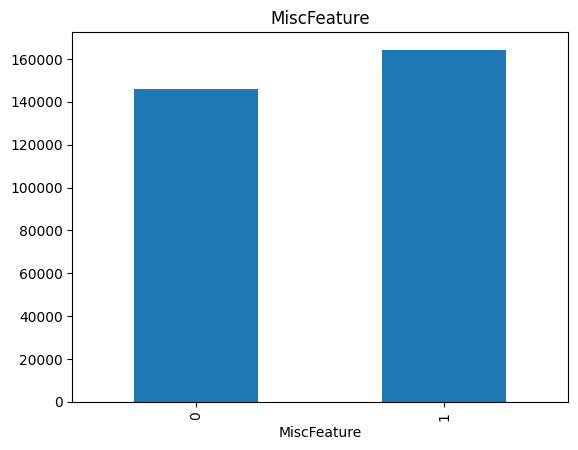

In [17]:
for feature in Missing_features:
 data = housing.copy()

# let's make a variable that indicates 1 if the observation was missing or zero otherwise
 data[feature] = np.where(data[feature].isnull(),1,0)

# let's calculate the mean SalePrice where the information is missing or present
 data.groupby(feature)['SalePrice'].median().plot.bar()
 plt.title(feature)
 plt.show()
   

### <font color = darkblue> Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do Below:

## <font color = maroon>Looking for the values in each column that have correct unique values and Handling the missing values and incorrect values:-

## <font color = maroon> First, Looking for the values in each column that they have correct unique values 

In [18]:
housing['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [19]:
housing["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [20]:
housing["MSZoning"] = np.where(housing["MSZoning"] == "C (all)", "C", housing["MSZoning"])

In [21]:
housing["MSZoning"].unique()

array(['RL', 'RM', 'C', 'FV', 'RH'], dtype=object)

In [22]:
housing["LotFrontage"].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [23]:
housing["Street"].unique()

array(['Pave', 'Grvl'], dtype=object)

In [24]:
housing["LotShape"].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [25]:
housing["LandContour"].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [26]:
housing["Utilities"].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [27]:
housing["LotConfig"].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [28]:
housing["LandSlope"].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [29]:
housing["Neighborhood"].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [30]:
housing["Neighborhood"] = np.where(housing["Neighborhood"] == "NAmes", "Names", housing["Neighborhood"])

In [31]:
housing["Neighborhood"].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'Names',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [32]:
housing["Condition1"].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [33]:
housing["Condition2"].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [34]:
housing["BldgType"].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [35]:
housing["BldgType"] = np.where(housing["BldgType"] == "2fmCon", "2FmCon", housing["BldgType"])
housing["BldgType"] = np.where(housing["BldgType"] == "Duplex", "Duplx", housing["BldgType"])
housing["BldgType"] = np.where(housing["BldgType"] == "Twnhs", "TwnhsI", housing["BldgType"])

In [36]:
housing["BldgType"].unique()

array(['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI'], dtype=object)

In [37]:
housing["HouseStyle"].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [38]:
housing["RoofStyle"].unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [39]:
housing["RoofMatl"].unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [40]:
housing["Exterior1st"].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [41]:
housing["Exterior2nd"].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [42]:
housing["Exterior2nd"] = np.where(housing["Exterior2nd"] == "Wd Shng", "WdShing", housing["Exterior2nd"])
housing["Exterior2nd"] = np.where(housing["Exterior2nd"] == "CmentBd", "CemntBd", housing["Exterior2nd"])
housing["Exterior2nd"] = np.where(housing["Exterior2nd"] == "Brk Cmn", "BrkComm", housing["Exterior2nd"])

In [43]:
housing["Exterior2nd"].unique()

array(['VinylSd', 'MetalSd', 'WdShing', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CemntBd', 'BrkFace', 'Stucco', 'AsbShng', 'BrkComm', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [44]:
housing["ExterQual"].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [45]:
housing["ExterCond"].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [46]:
housing["Foundation"].unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

In [47]:
housing["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [48]:
housing["BsmtCond"].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [49]:
housing["BsmtExposure"].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [50]:
housing["BsmtFinType1"].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [51]:
housing["BsmtFinType2"].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [52]:
housing["Heating"].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

In [53]:
housing["HeatingQC"].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [54]:
housing["CentralAir"].unique()

array(['Y', 'N'], dtype=object)

In [55]:
housing["Electrical"].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [56]:
housing["KitchenQual"].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [57]:
housing["Functional"].unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [58]:
housing["FireplaceQu"].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [59]:
housing["GarageType"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [60]:
housing["GarageFinish"].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [61]:
housing["GarageQual"].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [62]:
housing["GarageCond"].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [63]:
housing["PavedDrive"].unique()

array(['Y', 'N', 'P'], dtype=object)

In [64]:
housing["PoolQC"].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [65]:
housing["Fence"].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [66]:
housing["MiscFeature"].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [67]:
housing["SaleType"].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [68]:
housing["SaleCondition"].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

## <font color = maroon> Second, now Handling the missing values:-

### <font color = darkblue>1. The first null column is 'LotFrontage'. It consists of measurements of Linear feet of street connected to property. I  will use average of measurements of Lot frontage to fill up the missing data'

In [69]:
housing['LotFrontage'].fillna(value=housing['LotFrontage'].mean(), inplace= True)

### <font color = darkblue> 2.The Second null column is'Alley'- There are two categories Grvl and Pave with 3% and 2 %. Also, it got 93.76% of Null values. In this case, we are going to make a new category called 'NA' (no alley access) for all null values.

In [70]:
housing['Alley'].fillna(value='NA', inplace= True)

### **<font color='darkblue'>3. The third null column is 'MasVnrType'. Since we are not sure about the type of MasVnr that missing values could be. We are going to fill the missing values with 'None' category</font>**

In [71]:
housing['MasVnrType'].fillna(value='None', inplace= True)

### **<font color='darkblue'>4. The fourth null column is 'MasVnrArea'. When we observe the MasVnrArea column in DataFrame, we notice that majority of areas are filled with '0'. Since we do not know the missing values, We can assume that missing values as '0' </font>**

In [72]:
housing['MasVnrArea'].fillna(value='0', inplace= True)

### **<font color='darkblue'>5 - 9. The fifth to ninth null columns are all 'basement features' column. Missing values in all of these columns are considered as there are no basement. So all the missing values in these columns can be filled with new category called 'NA' (considering no basement)Except where the basment finished square feet is more than zero there we have add the mode value. </font>**

In [73]:
housing['BsmtExposure'] = np.where(
    (housing['BsmtExposure'].isnull()) & (housing['BsmtFinSF1'] > 0),
    'NO',
    np.where(housing['BsmtExposure'].isnull(), 'NA', housing['BsmtExposure'])
)

In [74]:
housing['BsmtFinType2']= np.where(
    (housing['BsmtFinType2'].isnull()) & (housing['BsmtFinSF1'] > 0),
    'Unf',
    np.where(housing['BsmtFinType2'].isnull(), 'NA', housing['BsmtFinType2'])
)

In [75]:
housing['BsmtQual'].fillna(value='NA', inplace= True)
housing['BsmtCond'].fillna(value='NA', inplace= True)
housing['BsmtFinType1'].fillna(value='NA', inplace= True)

### **<font color='darkblue'>Checking :-</font>**

In [76]:
columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
subset = housing[columns]
subset.head(40)

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2
0        Gd       TA           No          GLQ          Unf
1        Gd       TA           Gd          ALQ          Unf
2        Gd       TA           Mn          GLQ          Unf
3        TA       Gd           No          ALQ          Unf
4        Gd       TA           Av          GLQ          Unf
5        Gd       TA           No          GLQ          Unf
6        Ex       TA           Av          GLQ          Unf
7        Gd       TA           Mn          ALQ          BLQ
8        TA       TA           No          Unf          Unf
9        TA       TA           No          GLQ          Unf
10       TA       TA           No          Rec          Unf
11       Ex       TA           No          GLQ          Unf
12       TA       TA           No          ALQ          Unf
13       Gd       TA           Av          Unf          Unf
14       TA       TA           No          BLQ          Unf
15       TA       TA           No          Unf          Unf
16       TA       TA           No          ALQ          Unf
17       NA       NA           NA           NA           NA
18       TA       TA           No          GLQ          Unf
19       TA       TA           No          LwQ          Unf
20       Ex       TA           Av          Unf          Unf
21       TA       TA           No          Unf          Unf
22       Gd       TA           No          Unf          Unf
23       Gd       TA           No          GLQ          Unf
24       TA       TA           Mn          Rec          ALQ
25       Gd       TA           No          Unf          Unf
26       TA       TA           Mn          BLQ          Rec
27       Ex       TA           No          GLQ          Unf
28       TA       TA           Gd          BLQ          Unf
29       TA       TA           No          Unf          Unf
30       TA       TA           No          Unf          Unf
31       TA       TA           No          Unf          Unf
32       Ex       TA           Av          Unf          Unf
33       TA       TA           No          Rec          Unf
34       Ex       TA           No          GLQ          Unf
35       Ex       TA           Av          Unf          Unf
36       Gd       TA           No          Unf          Unf
37       TA       TA           No          Rec          Unf
38       TA       TA           No          GLQ          Unf
39       NA       NA           NA           NA           NA

### **<font color='darkblue'>10. The tenth null column is 'Electrical'. Here the category 'SBrkr' has highest frequency of 91.36% ie it is the mode value. We can use 'SBrkr' category can be filled on missing values</font>**

In [77]:
housing['Electrical'].fillna(value='SBrkr', inplace= True)

### **<font color='darkblue'>11. The eleventh null column is 'FireplaceQu'. Similar to basement null columns, Missing values can be filled with new category called 'NA' (considering No fireplace)</font>**

In [78]:
(housing['Fireplaces']==0).sum()

690

In [79]:
housing['FireplaceQu'].isnull().sum()

690

In [80]:
housing['FireplaceQu'].fillna(value ='NA', inplace=True)

### **<font color='darkblue'> 12-16. The twelth to sixteenth null columns are all garage features null columns. similarly, we fill every missing value with category 'NA' (considering No garage).</font>**

In [81]:
(housing['GarageArea']==0).sum()

81

In [82]:
(housing['GarageCars']==0).sum()

81

In [83]:
housing['GarageType'].isnull().sum()

81

In [84]:
housing['GarageType'].fillna(value='NA', inplace= True)
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(housing['YearBuilt'], inplace=False)
housing['GarageFinish'].fillna(value='NA', inplace= True)
housing['GarageQual'].fillna(value='NA', inplace= True)
housing['GarageCond'].fillna(value='NA', inplace= True)

In [85]:
columns1 = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
subset = housing[columns1]
subset.tail(40)

GarageType  GarageYrBlt GarageFinish GarageQual GarageCond
1420     Attchd       1968.0          RFn         TA         TA
1421     Attchd       1977.0          RFn         TA         TA
1422     Attchd       2003.0          Fin         TA         TA
1423     Attchd       1966.0          Unf         Gd         Gd
1424     Detchd       1970.0          Unf         TA         TA
1425     Detchd       1960.0          Unf         TA         TA
1426     Attchd       1994.0          RFn         TA         TA
1427     Attchd       1962.0          Unf         TA         TA
1428     Attchd       1940.0          Unf         TA         TA
1429     Attchd       1981.0          Fin         TA         TA
1430    BuiltIn       2005.0          Fin         TA         TA
1431     Attchd       1976.0          RFn         TA         TA
1432     Detchd       1928.0          Unf         Fa         Fa
1433     Attchd       2000.0          Fin         TA         TA
1434     Attchd       1977.0          RFn         TA         TA
1435     Attchd       1962.0          RFn         TA         TA
1436     Detchd       1974.0          Unf         TA         TA
1437     Attchd       2008.0          Fin         TA         TA
1438     Attchd       1957.0          Unf         TA         TA
1439     Attchd       1979.0          RFn         TA         TA
1440     Detchd       1993.0          Fin         TA         TA
1441     Attchd       2004.0          RFn         TA         TA
1442     Attchd       2008.0          Fin         TA         TA
1443     Detchd       1916.0          Unf         Fa         Po
1444     Attchd       2004.0          RFn         TA         TA
1445     Detchd       1990.0          Unf         TA         TA
1446     Attchd       1962.0          Unf         TA         TA
1447     Attchd       1995.0          RFn         TA         TA
1448     Detchd       1950.0          Unf         Fa         TA
1449         NA       1970.0           NA         NA         NA
1450         NA       1974.0           NA         NA         NA
1451     Attchd       2008.0          Fin         TA         TA
1452    Basment       2005.0          Fin         TA         TA
1453         NA       2006.0           NA         NA         NA
1454     Attchd       2004.0          RFn         TA         TA
1455     Attchd       1999.0          RFn         TA         TA
1456     Attchd       1978.0          Unf         TA         TA
1457     Attchd       1941.0          RFn         TA         TA
1458     Attchd       1950.0          Unf         TA         TA
1459     Attchd       1965.0          Fin         TA         TA

### **<font color='darkblue'>17. The seventeenth null column is 'PoolQC'. we use category 'NA' (considering No pool) on missing values similar to above null columns.</font>**

In [86]:
(housing['PoolArea']==0).sum()

1453

In [87]:
housing['PoolQC'].isnull().sum()

1453

In [88]:
housing['PoolQC'].fillna(value='NA', inplace= True)

### **<font color='darkblue'>18. The Eighteenth null column is Fence. we use category 'NA' (considering No fence) on missing values similar to above null columns.</font>**

In [89]:
housing['Fence'].fillna(value='NA', inplace= True)

### **<font color='darkblue'>19. The Last null column is 'MiscFeature'. we use category 'NA' on missing values similar to third null columns.</font>**

In [90]:
housing['MiscFeature'].fillna(value='NA', inplace= True)

### **<font color='darkblue'>Checking for null values:-</font>**

In [91]:
housing.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [92]:
housing.isnull().any().sum() 

0

### **<font color='darkblue'>Hence, there are no null values, Data is cleaned</font>**

## <font color = maroon> Downloading the clean data to excel now.

In [93]:
clean_data = housing

In [94]:
clean_data.to_excel('clean_data.xlsx', index=False)

In [95]:
clean_data["Neighborhood"].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'Names',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

## <font color = Maroon>Numerical Variables

In [96]:
# list of numerical variables
numerical_features = [feature for feature in housing.columns if housing[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
housing[numerical_features].head()

Number of numerical variables:  37


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0          2003         706           0        150          856       856   
1          1976         978           0        284         1262      1262   
2          2002         486           0        434          920       920   
3          1970         216           0        540          756       961   
4          2000         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

### **<font color='darkblue'>SO, we see here we have 37 Numeric features out of which 4 are Datetime Variables i.e (YearBuilt,YearRemodAdd,GarageYrBlt and YrSold) </font>**

In [97]:
# list of variables that contain year information
years = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

years

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

### **<font color='darkblue'> Lets analyze the  Datetime Variables. I will check whether there is a relation between year the house is sold and the sales price </font>**

Text(0.5, 1.0, 'House Price vs YearSold')

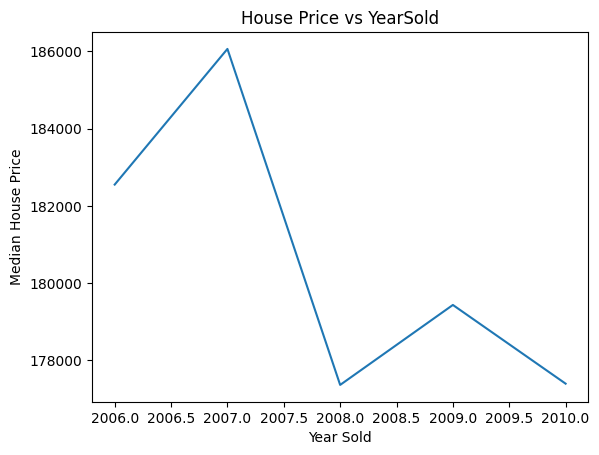

In [98]:
housing.groupby('YrSold')['SalePrice'].mean().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

### **<font color='darkblue'> Here this intresting to know that in the dataset avarage house prices are decreasing over the years. </font>**

### **<font color='darkblue'> Now lets compare the difference between All years feature with SalePrice .Here we are plotting the graph considering the diffrence in year house was sold  with the year feature ( eg. year buit ). </font>**

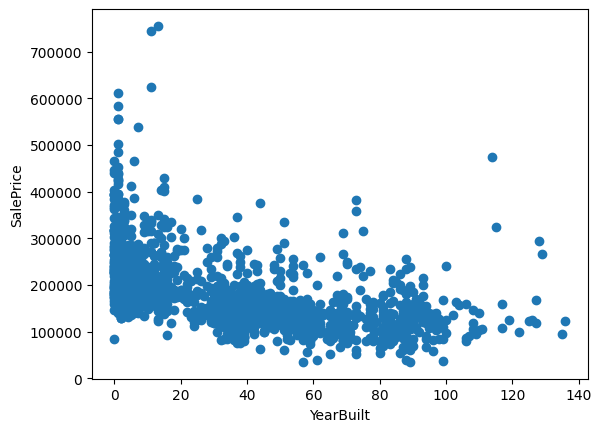

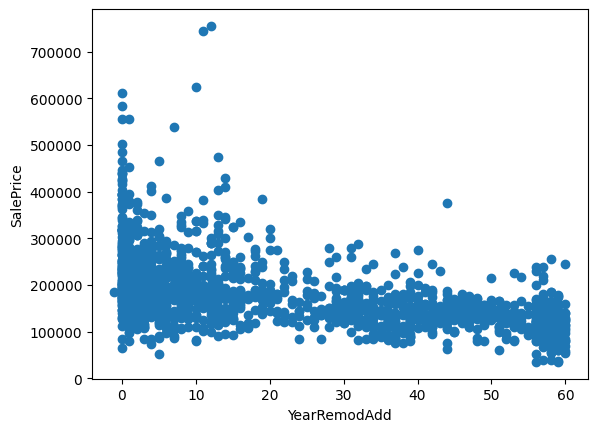

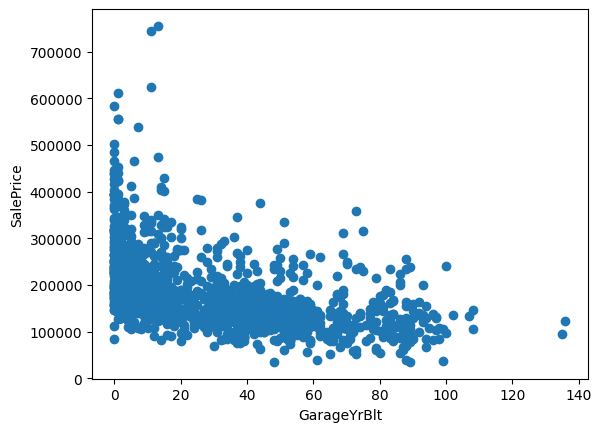

In [99]:
for feature in years:
    if feature!='YrSold':
        data=housing.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

### **<font color='darkblue'> So these observation show the data is true as the custruction is new it is sold for higher price however we notice that if the property is more than 20 years till 100 years there is very littel diffrence. or we can say it is declining at very slow pace. </font>**

### **<font color='darkblue'> Now lets look at the 2 type of Numerical variables that are Discrete Variables</font>**

In [100]:
discrete =[feature for feature in numerical_features if len(housing[feature].unique())<25 and feature not in years+['Id']]
print("Discrete Variables Count: {}".format(len(discrete)))

Discrete Variables Count: 17


In [101]:
housing[discrete].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

### **<font color='darkblue'> Lets find the realtionship between them and Dependent variable Sale Price </font>**


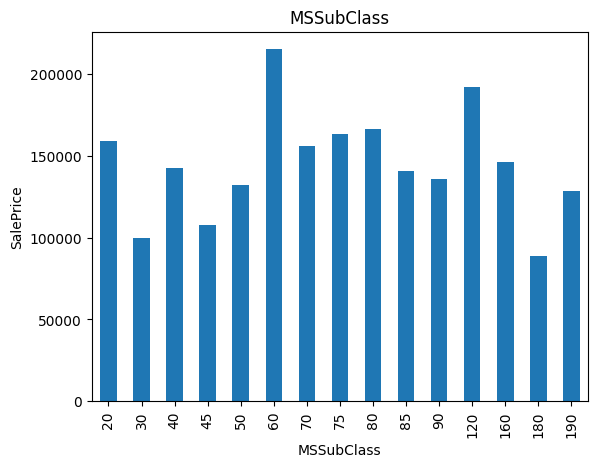

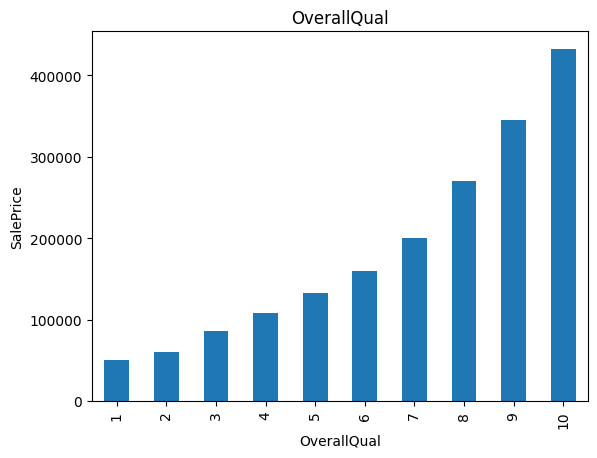

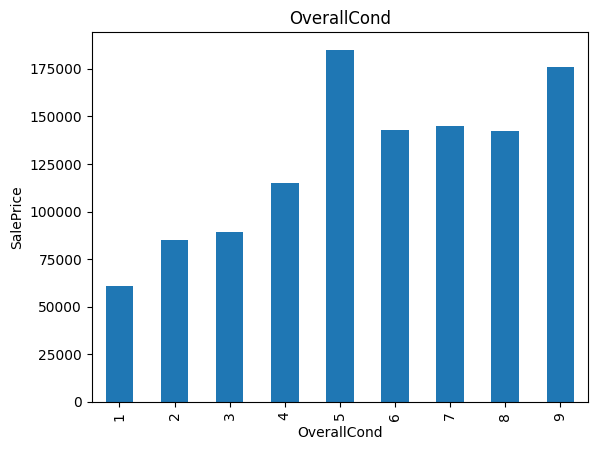

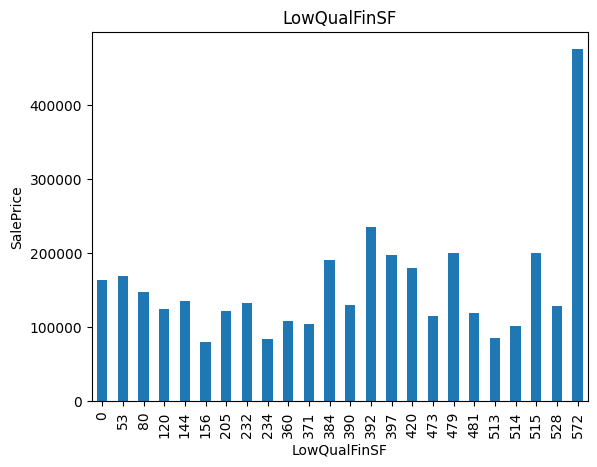

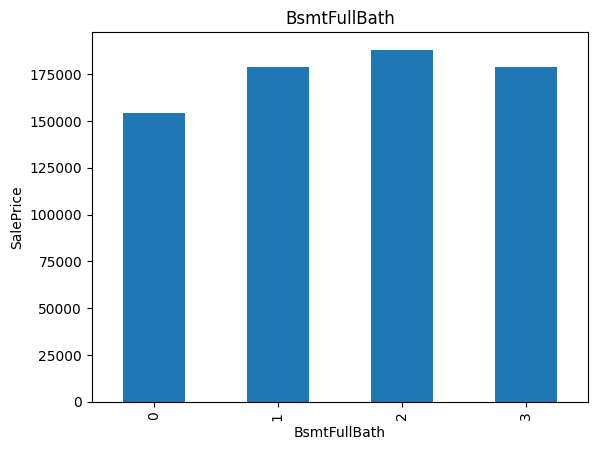

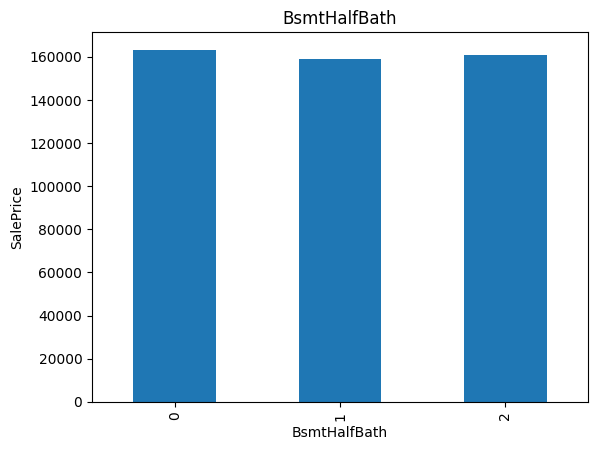

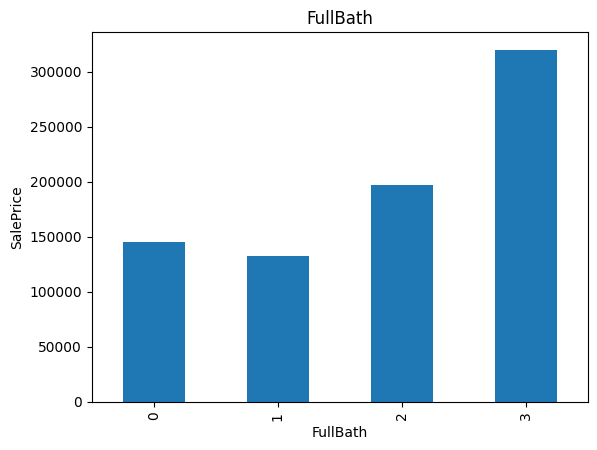

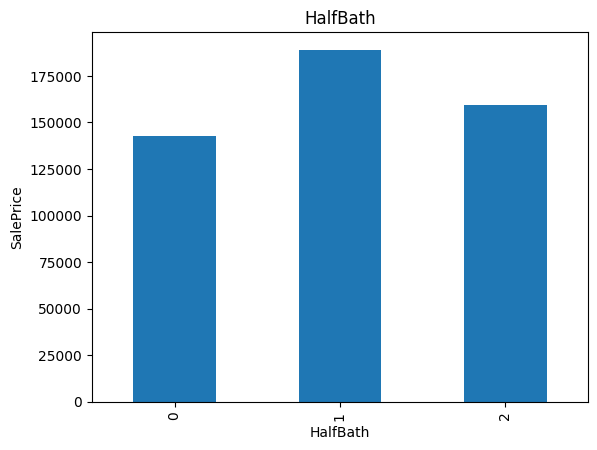

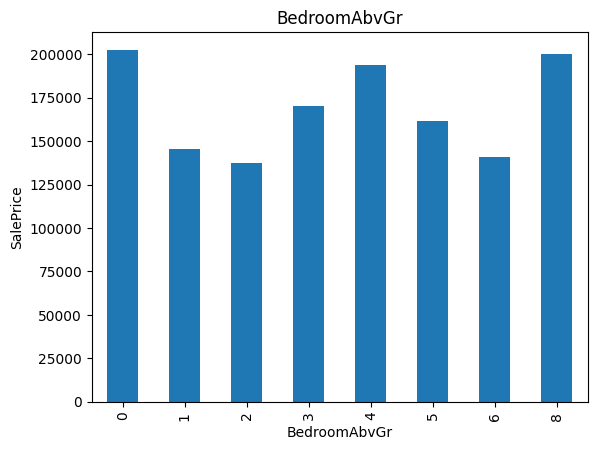

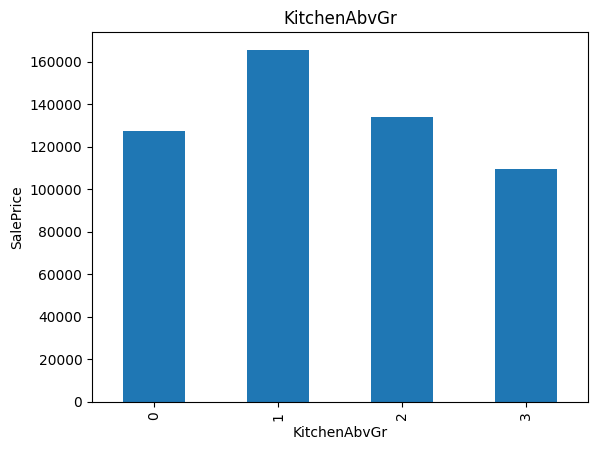

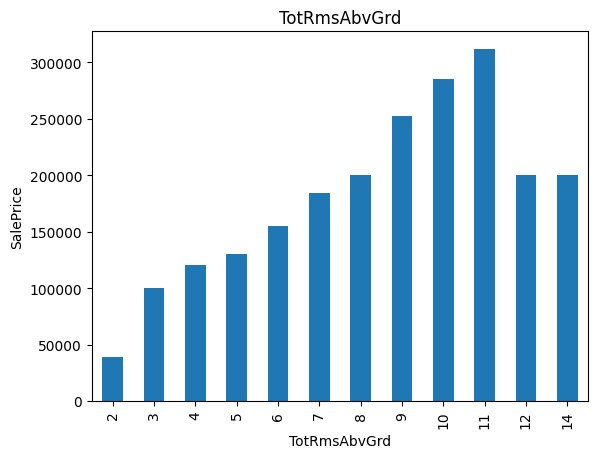

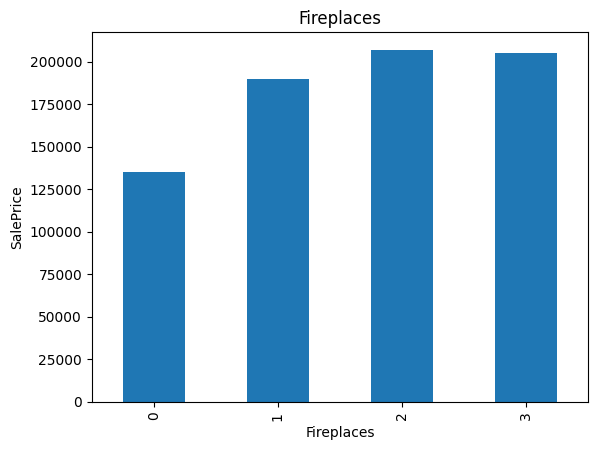

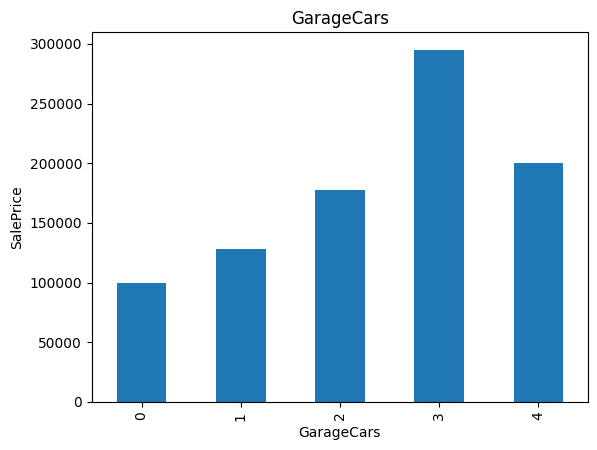

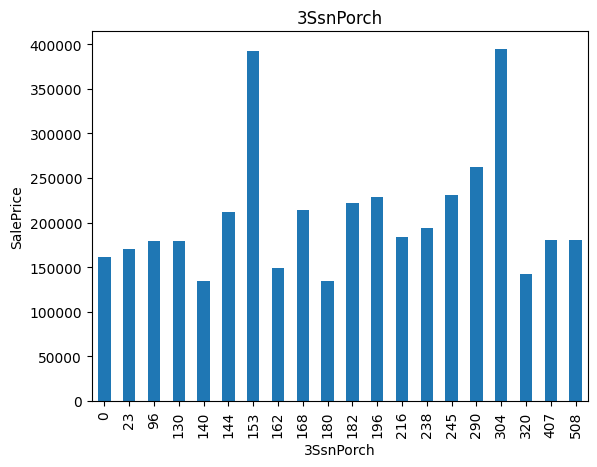

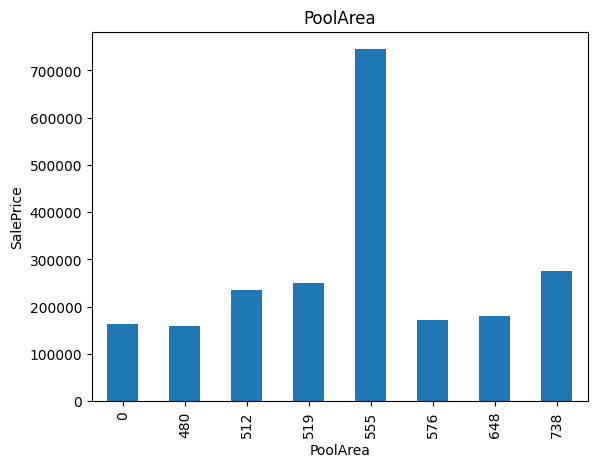

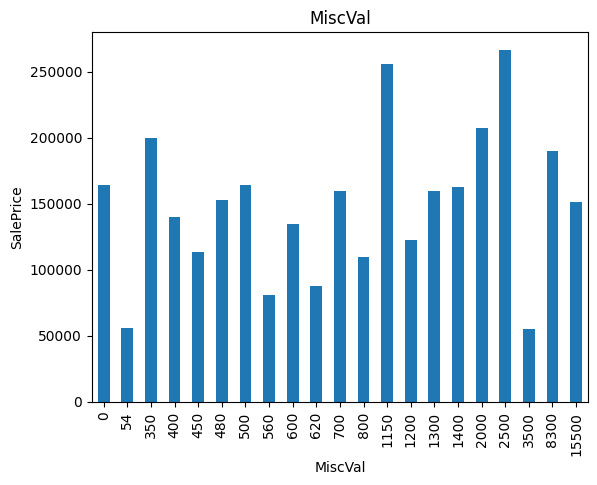

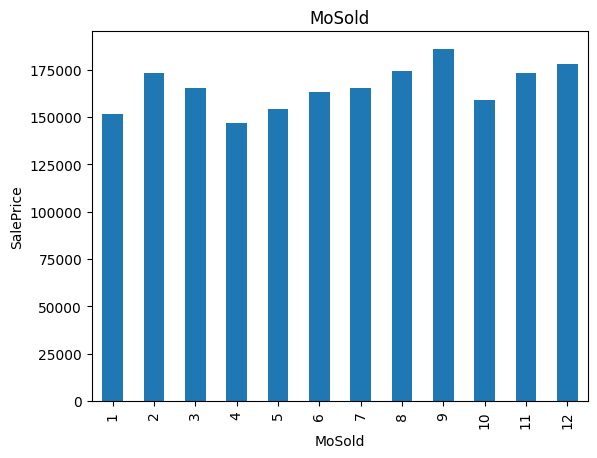

In [102]:
for feature in discrete:
    data=housing.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### **<font color='darkblue'> Continuous Variable </font>**

In [103]:
continuous=[feature for feature in numerical_features if feature not in discrete+years+['Id']]
print("Continuous feature Count {}".format(len(continuous)))

Continuous feature Count 15


### **<font color='darkblue'> Lets analyse the continuous values by creating histograms to understand the distribution </font>**

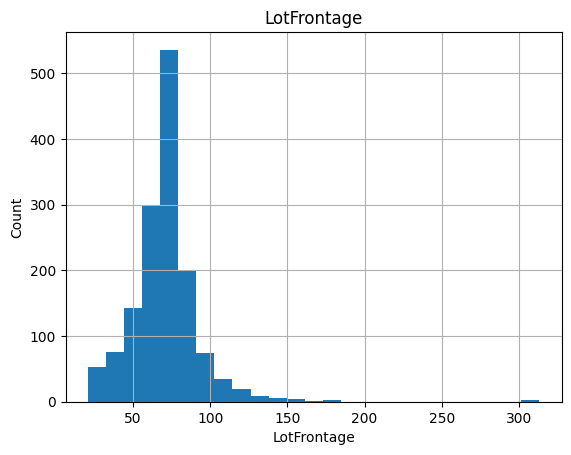

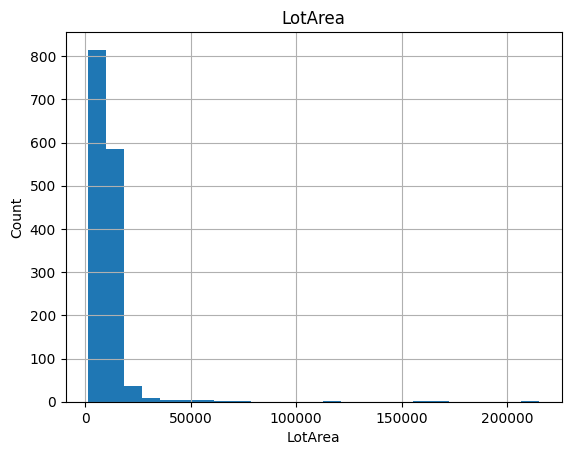

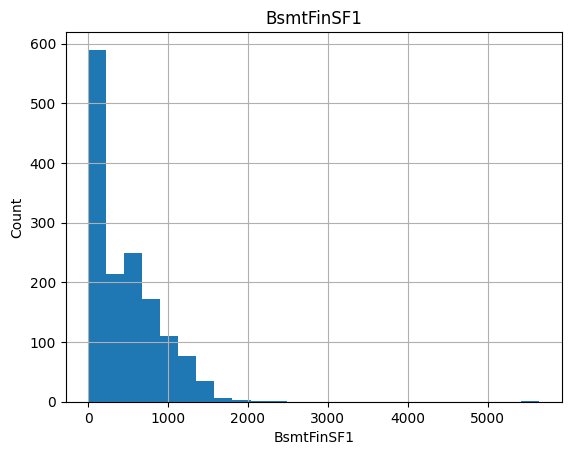

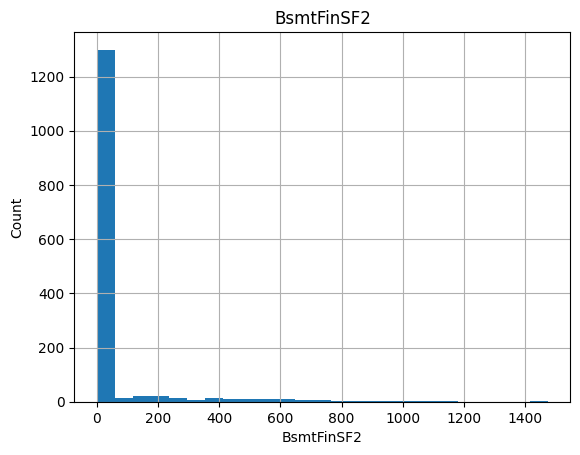

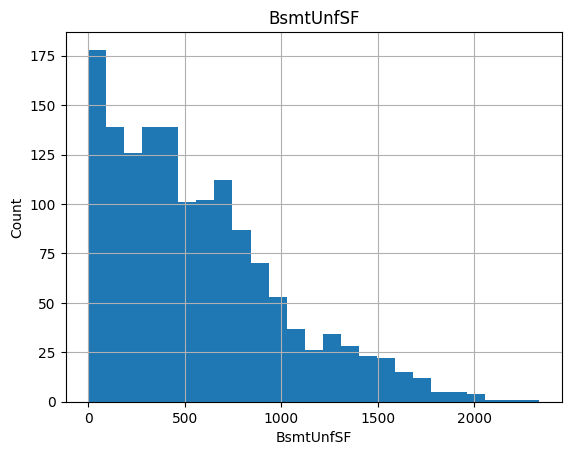

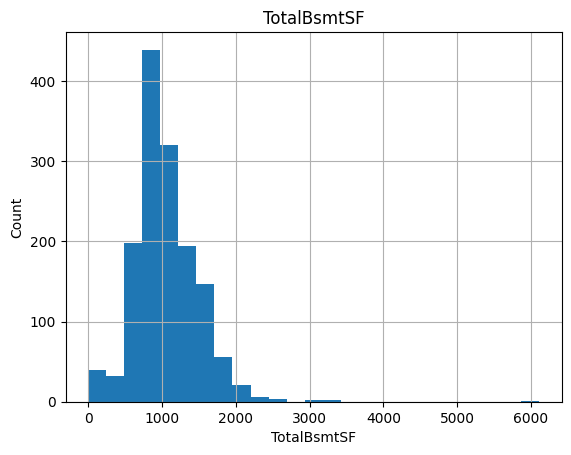

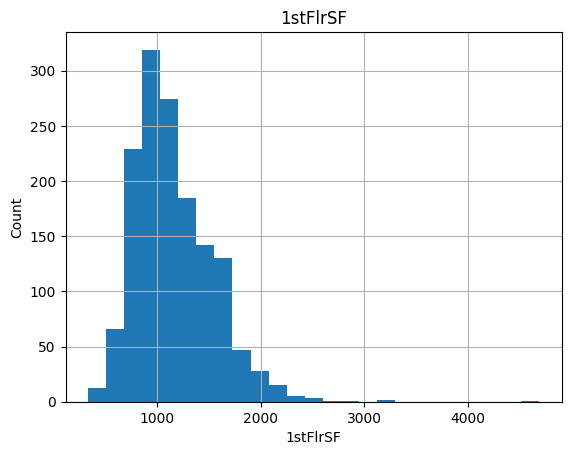

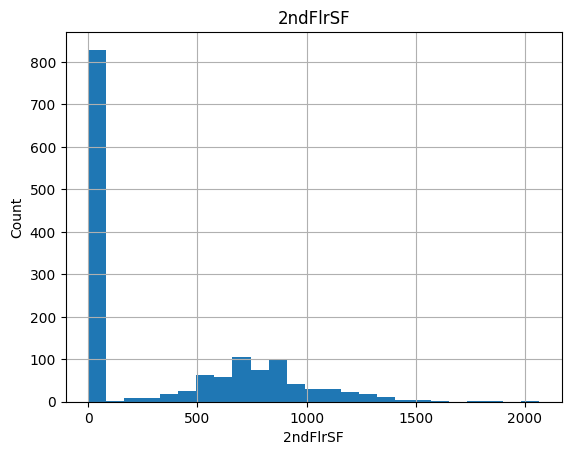

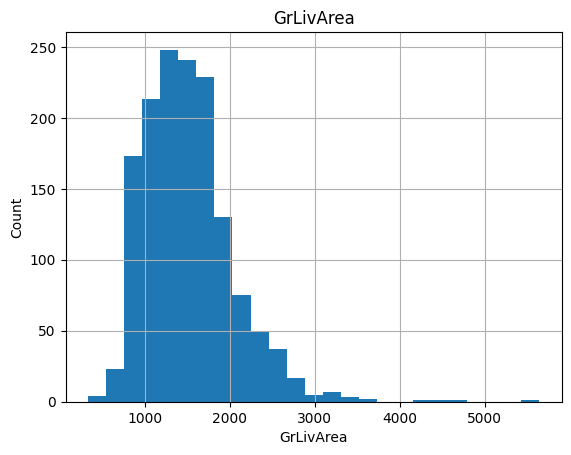

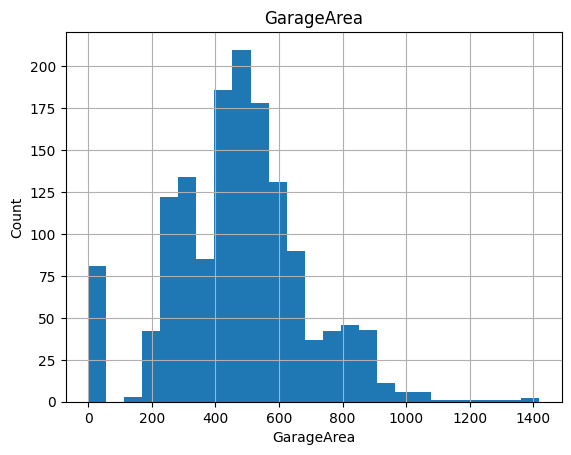

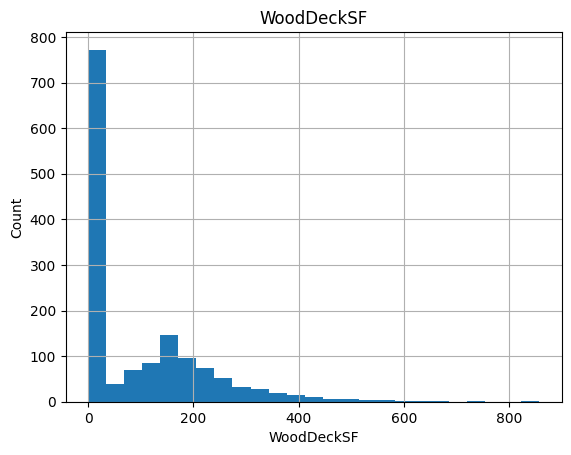

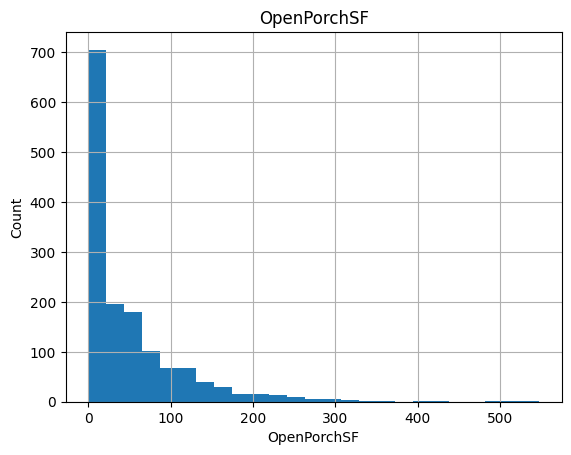

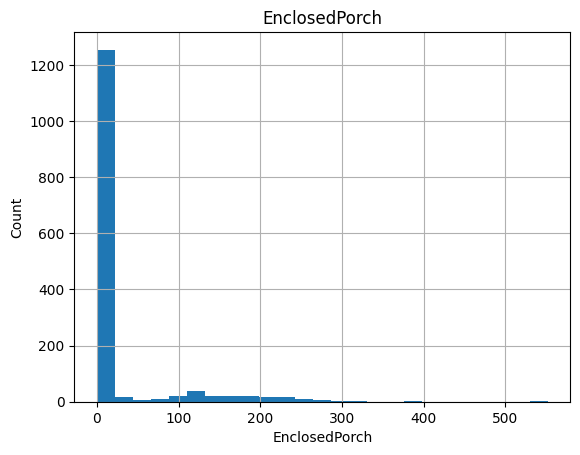

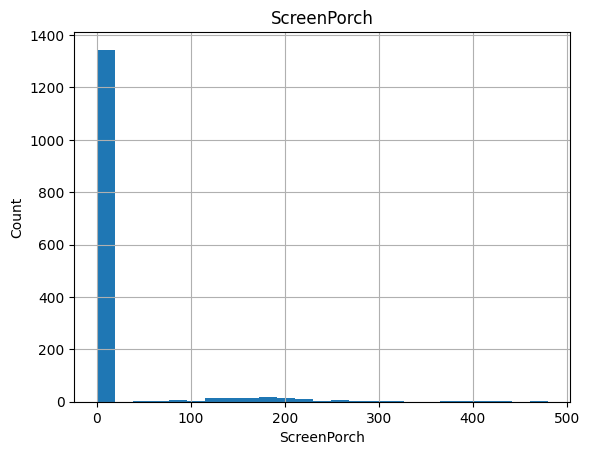

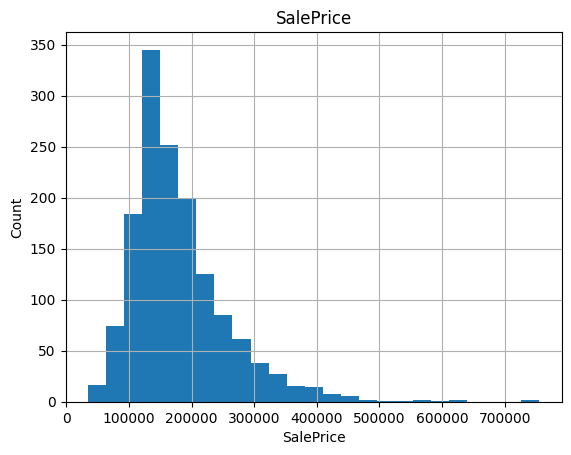

In [104]:
for feature in continuous:
    data=housing.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### **<font color='darkblue'> Lets Outliers in the continuous values</font>**

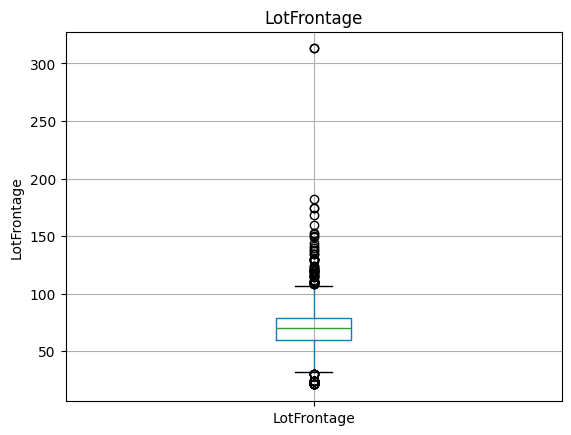

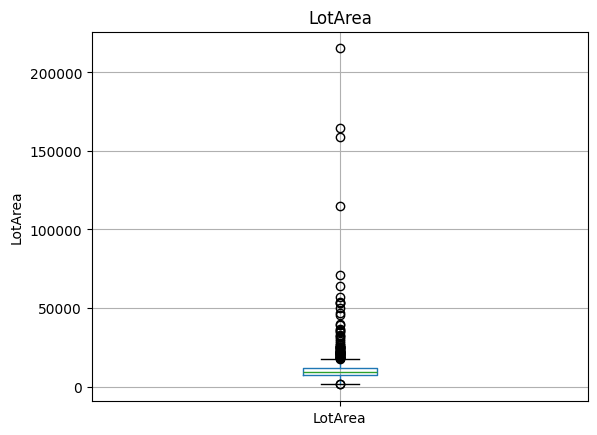

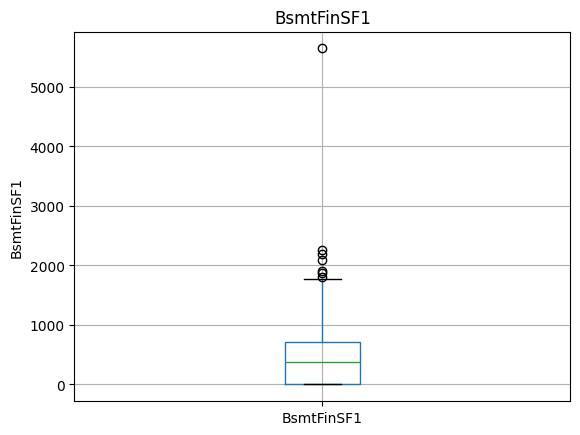

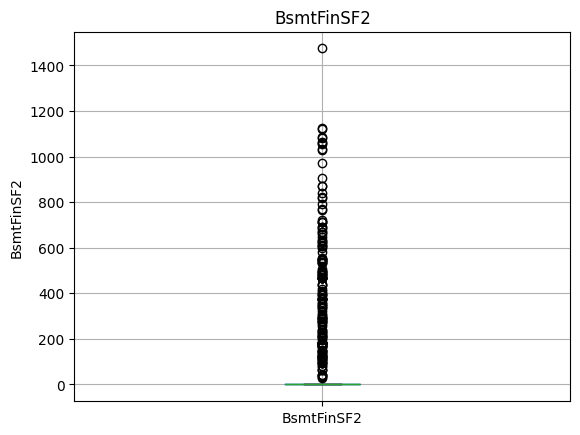

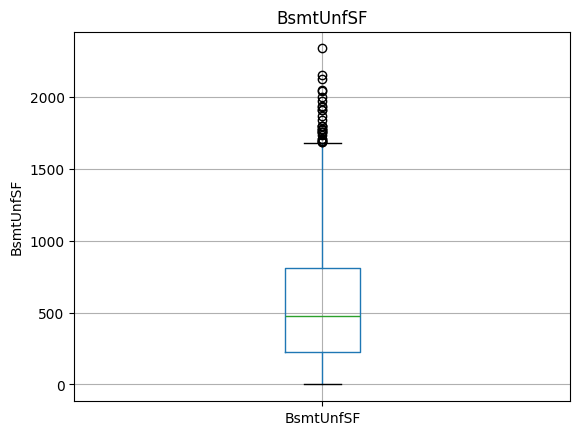

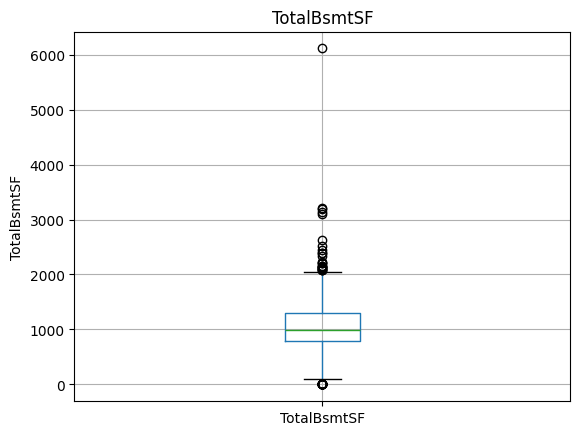

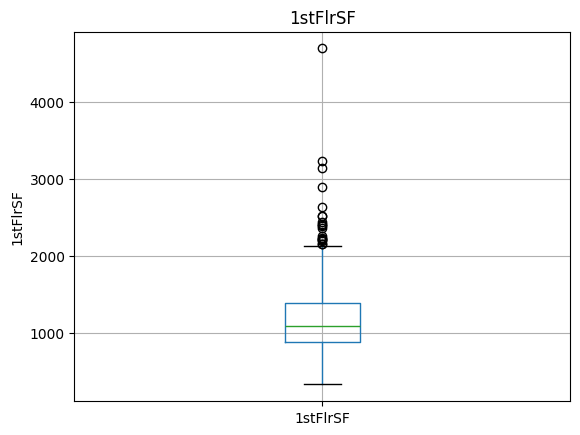

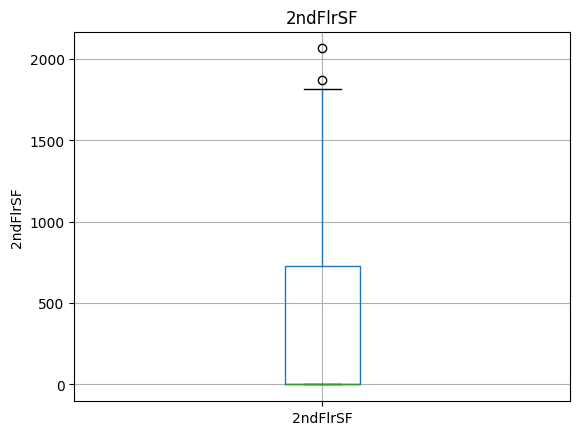

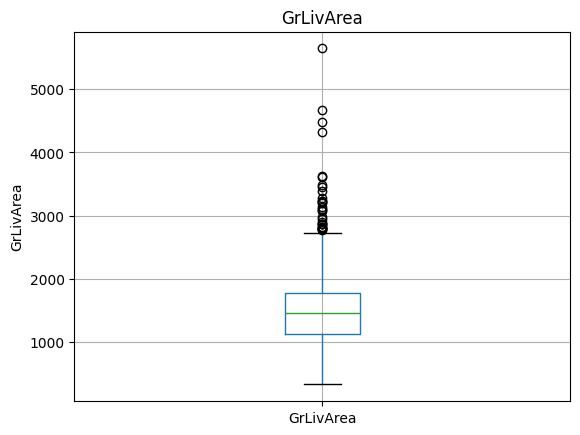

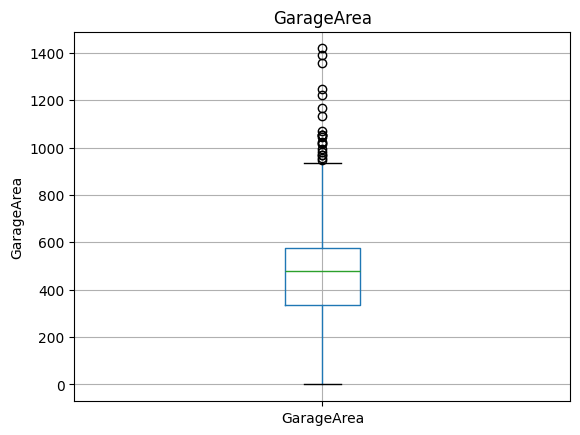

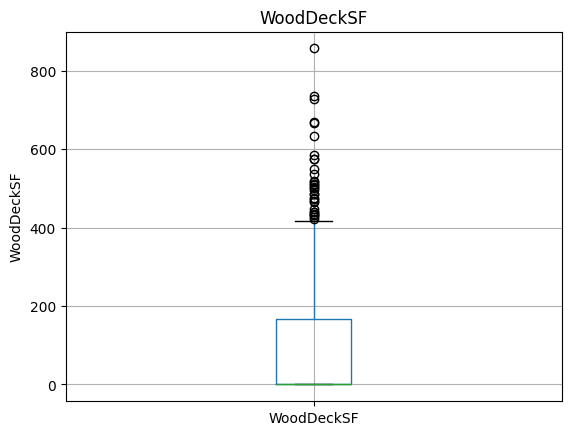

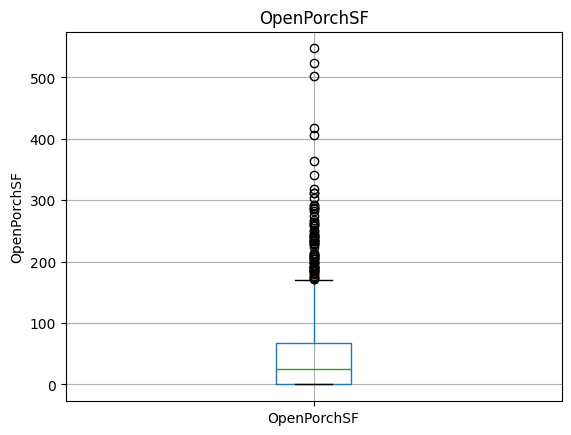

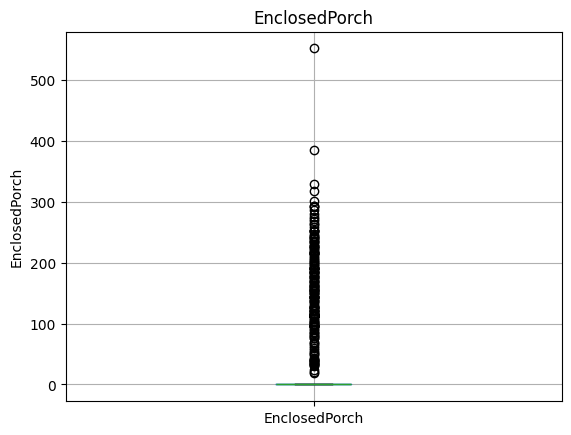

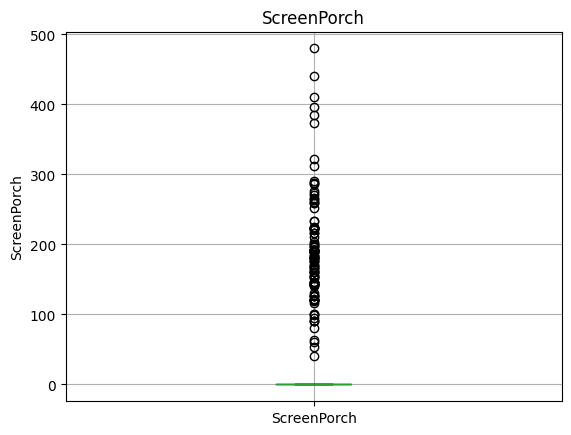

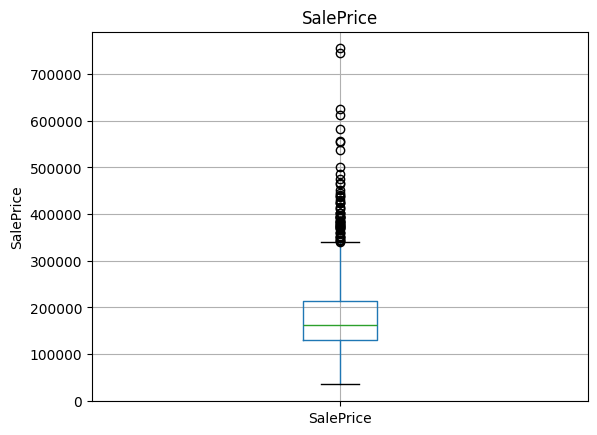

In [105]:
for feature in continuous:
    data=housing.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### **<font color='darkblue'>Categorical Variables </font>**

In [106]:
categorical_features=[feature for feature in housing.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [107]:
housing[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave    NA      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave    NA      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave    NA      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave    NA      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace      196.0        Gd        TA   
1     MetalSd     MetalSd       None        0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace      162.0        Gd        TA   
3     Wd Sdng     WdShing       None        0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace      350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating  \
0      PConc       Gd       TA           No          GLQ          Unf    GasA   
1     CBlock       Gd       TA           Gd          ALQ          Unf    GasA   
2      PConc       Gd       TA           Mn          GLQ          Unf    GasA   
3     BrkTil       TA       Gd           No          ALQ          Unf    GasA   
4      PConc       Gd       TA           Av          GLQ          Unf    GasA   

  HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu  \
0        Ex          Y      SBrkr          Gd        Typ          NA   
1        Ex          Y      SBrkr          TA        Typ          TA   
2        Ex          Y      SBrkr          Gd        Typ          TA   
3        Gd          Y      SBrkr          Gd        Typ          Gd   
4        Ex          Y      SBrkr          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence  \
0     Attchd          RFn         TA         TA          Y     NA    NA   
1     Attchd          RFn         TA         TA          Y     NA    NA   
2     Attchd          RFn         TA         TA          Y     NA    NA   
3     Detchd          Unf         TA         TA          Y     NA    NA   
4     Attchd          RFn         TA         TA          Y     NA    NA   

  MiscFeature SaleType SaleCondition  
0          NA       WD        Normal  
1          NA       WD        Normal  
2          NA       WD        Normal  
3          NA       WD       Abnorml  
4          NA       WD        Normal

In [108]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(housing[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

In [109]:
features_with_na=[features for features in housing.columns if housing[features].isnull().sum()>1]

In [110]:
for feature in features_with_na:
 data = housing.copy()
# let's make a variable that indicates 1 if the observation was missing or z
 data[feature] = np.where(data[feature].isnull(), 1, 0)

# let's calculate the mean SalePrice where the information is missing or pre
 data.groupby(feature)['SalePrice'].median().plot.bar()
 plt.title(feature)
 plt.show()

In [111]:
for feature in features_with_na:
    data = housing.copy()  # Create a copy of the original DataFrame
    
    # Create a variable that indicates 1 if the observation was missing, or 0 otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # Calculate the median SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(f"Median SalePrice for {feature}")
    plt.xlabel(f"{feature} Missing or Present")
    plt.ylabel("Median SalePrice")
    plt.show()

In [112]:
data = housing.copy ()

In [113]:
numeric_df = housing.select_dtypes(include=np.number)

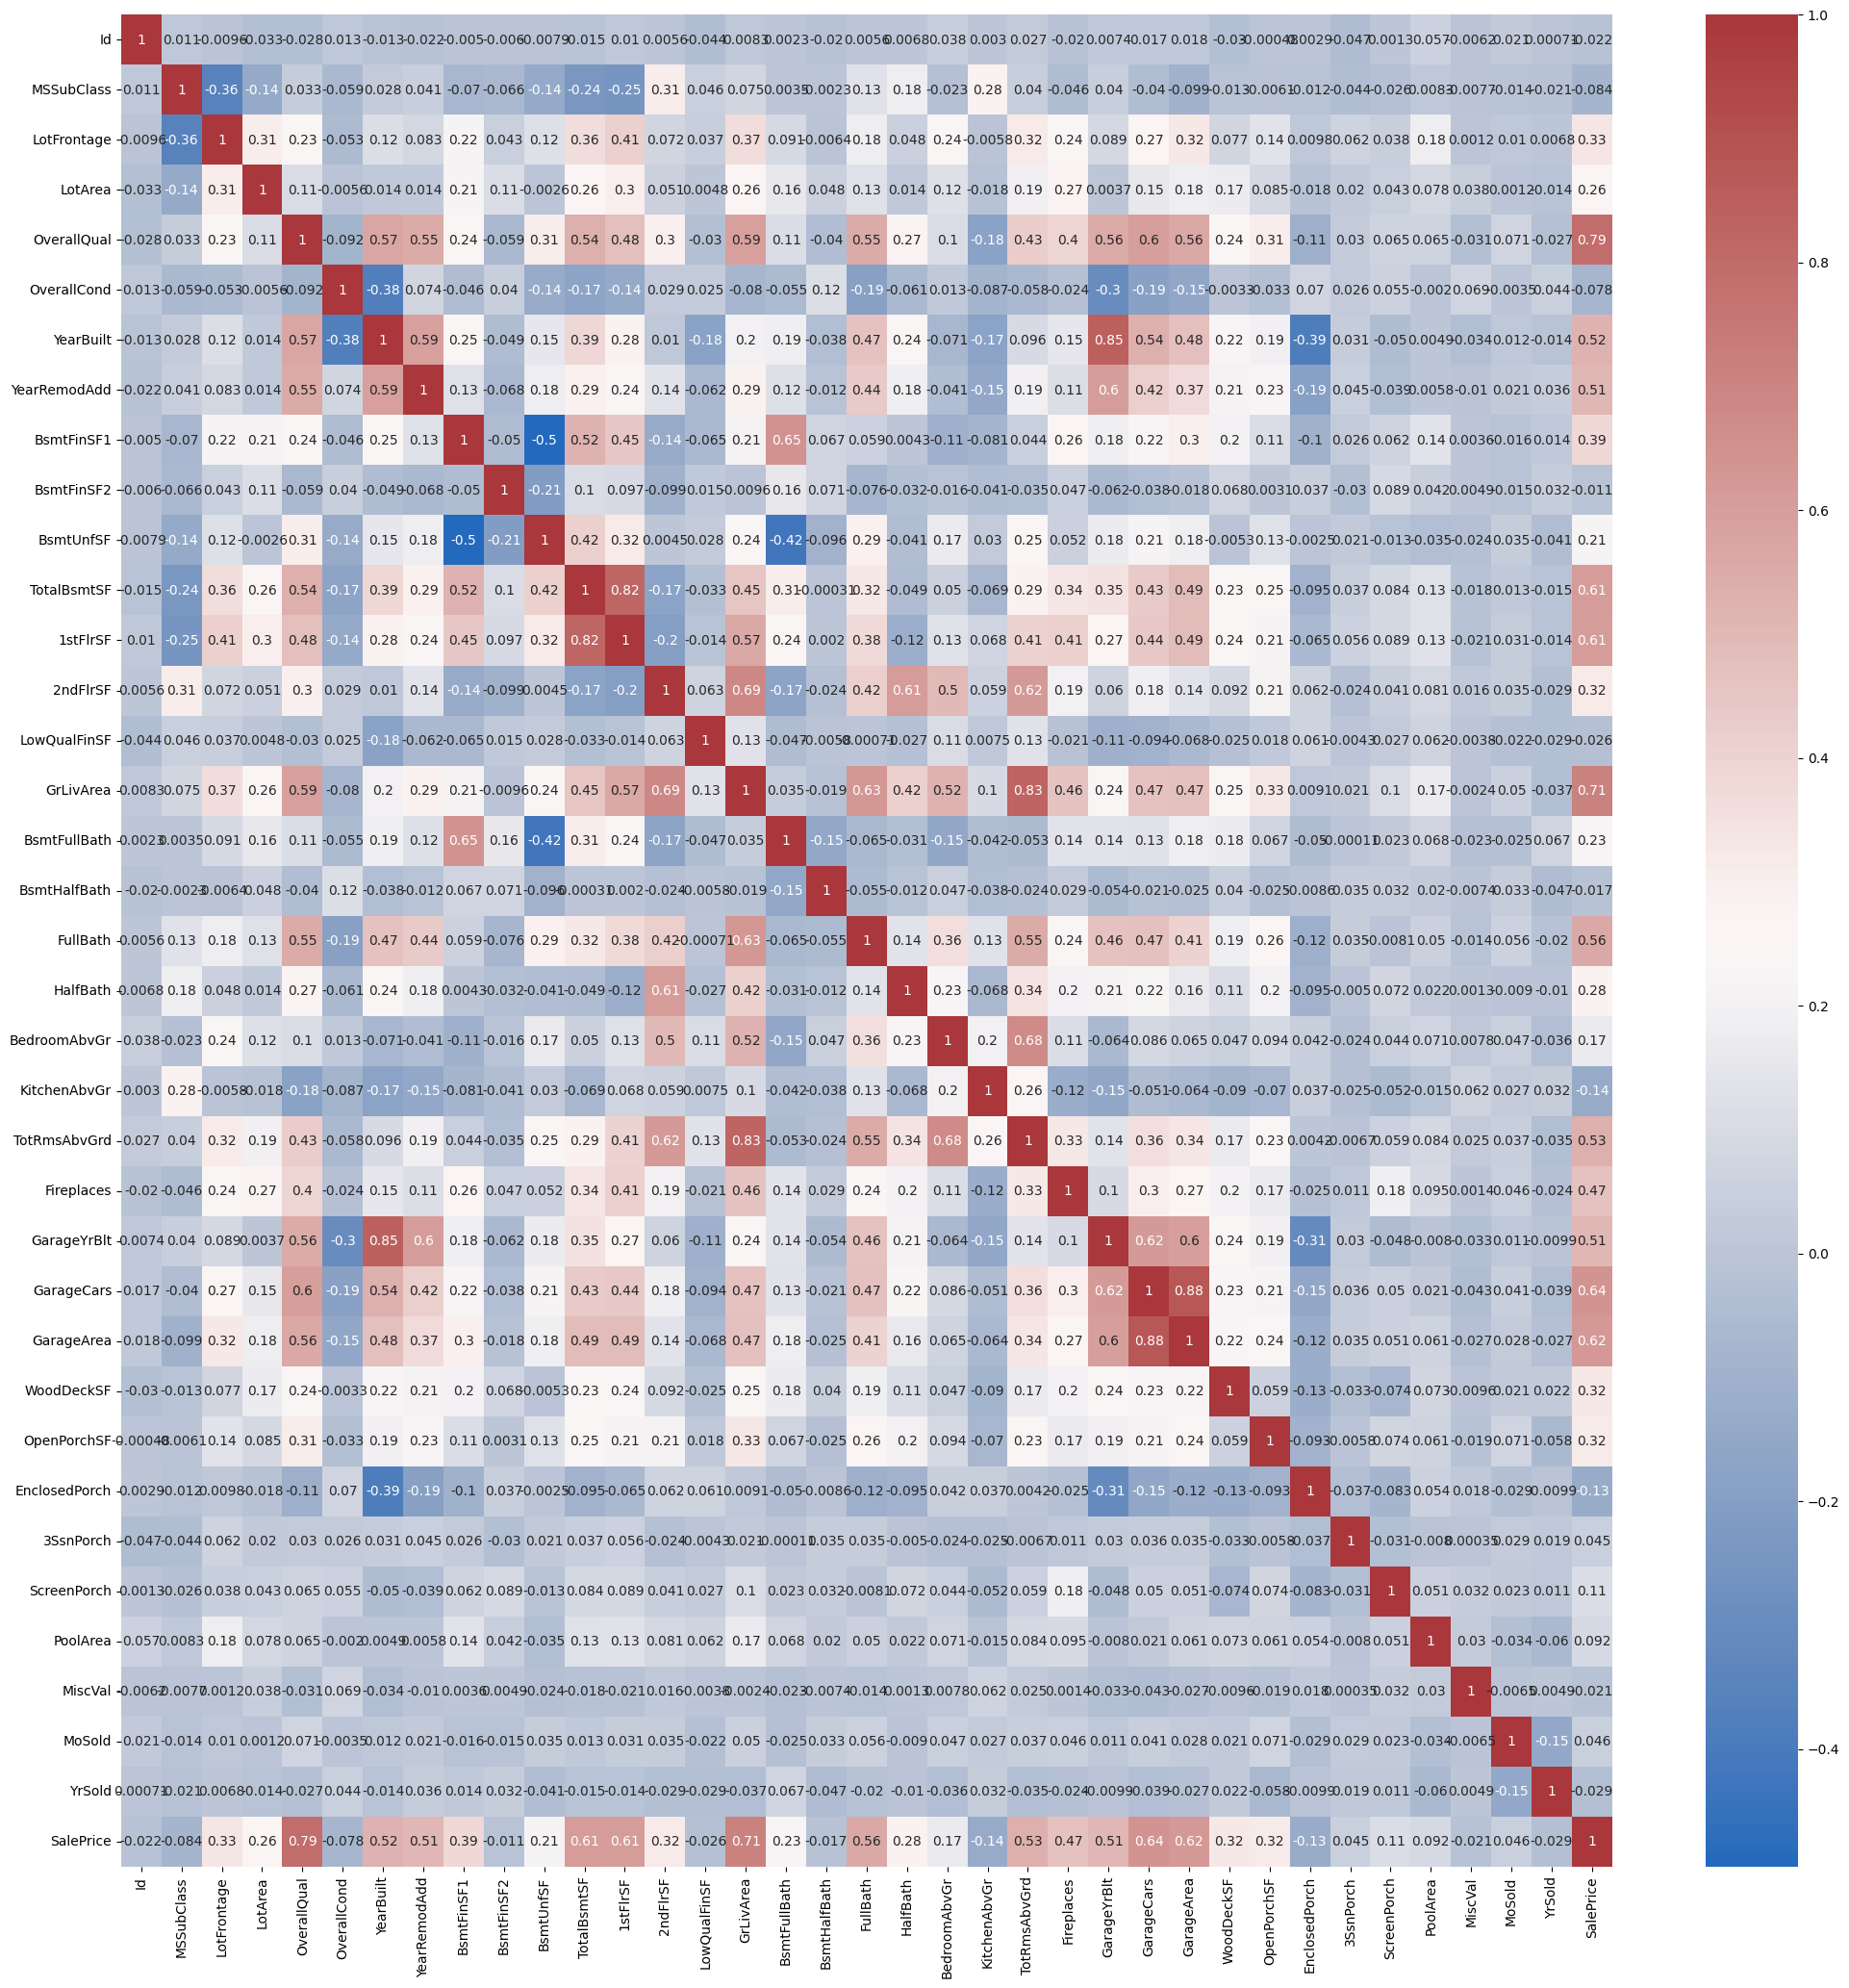

In [114]:
corrmat=numeric_df.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(25,25))
g=sns.heatmap(housing[top_corr_feature].corr(), annot=True,cmap="vlag")

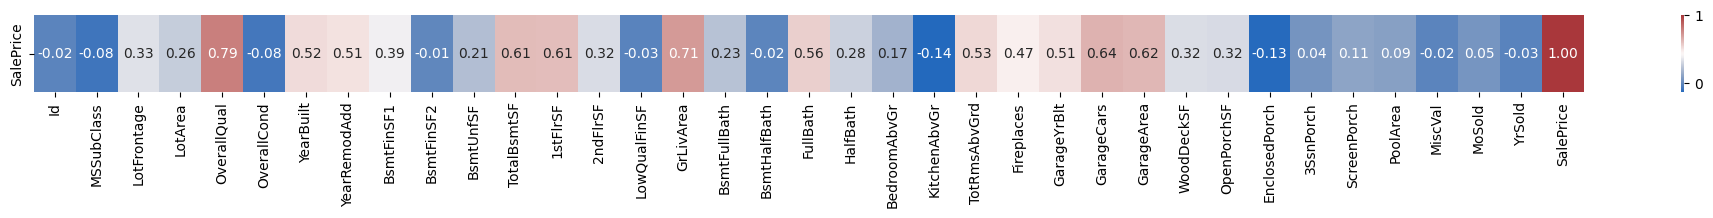

In [115]:
#correlation by salesprice
num = housing.select_dtypes(exclude = 'object')
numcorr = numeric_df.corr()
f, ax = plt.subplots(figsize = (25,1)) # set figure size
sns.heatmap(numcorr.sort_values(by = 'SalePrice', ascending = False).head(1), annot = True, fmt = ".2f",cmap="vlag")
plt.show()

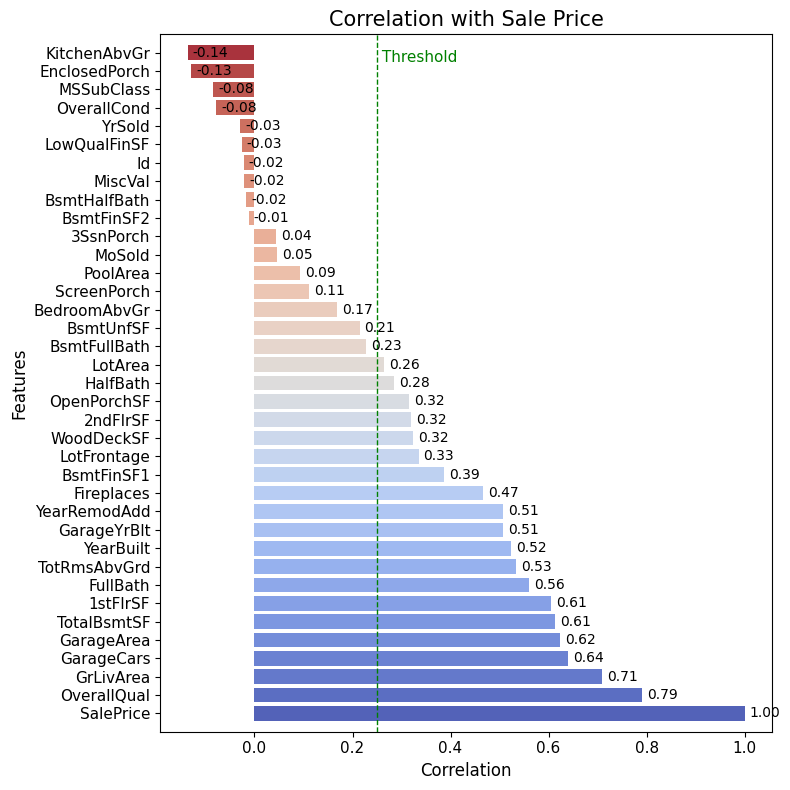

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort correlation values and create a bar plot
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
correlation_sorted = numcorr['SalePrice'].sort_values(ascending=False)
ax = sns.barplot(x=correlation_sorted.values, y=correlation_sorted.index, palette='coolwarm')

# Add a vertical line at 0.25
plt.axvline(x=0.25, color='green', linestyle='--', linewidth=1)
plt.text(0.25, len(correlation_sorted) - 1.5, ' Threshold', color='green', fontsize=11, ha='left')

# Add annotations
for i, val in enumerate(correlation_sorted.values):
    plt.text(val + 0.01, i, f'{val:.2f}', color='black', va='center')

# Customize plot aesthetics
plt.title('Correlation with Sale Price', fontsize=15)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.ylabel('Features', fontsize=12)
plt.xlabel('Correlation', fontsize=12)
plt.ylim(-1, len(correlation_sorted))  # Set y-axis limits to match number of features
plt.tight_layout()

plt.show()

## <font color = maroon>Adding few Custom coulms to the dataset 

In [117]:
#total rooms in basement custom columns
TotalBathroomsBasement=(1*housing["BsmtFullBath"])+(0.5*housing["BsmtHalfBath"])

In [118]:
housing.insert(49,"TotalBathBasement",TotalBathroomsBasement)

In [119]:
TotalBathroomsAboveGrade=(1*housing["FullBath"])+(0.5*housing["HalfBath"])

In [120]:
housing.insert(52,"TotalBathroomsAboveGrade",TotalBathroomsAboveGrade)

In [121]:
TotalBathrooms=(1*housing["TotalBathroomsAboveGrade"])+(1*housing["TotalBathBasement"])

In [122]:
housing.insert(53,"TotalBathrooms",TotalBathrooms)

In [123]:
TotalRooms=housing["TotalBathrooms"]+housing["BedroomAbvGr"]+housing["KitchenAbvGr"]

In [124]:
housing.insert(57,"TotalRooms",TotalRooms)

In [125]:
TotalRooms_bathroomas1=housing["BsmtFullBath"]+housing["BsmtHalfBath"]+housing["FullBath"]+housing["HalfBath"]+housing["BedroomAbvGr"]+housing["KitchenAbvGr"]

In [126]:
housing.insert(58,"TotalRooms_bathroomas1",TotalRooms_bathroomas1)

In [127]:
TotalPorchArea=housing["OpenPorchSF"]+housing["EnclosedPorch"]+housing["3SsnPorch"]+housing["ScreenPorch"]

In [128]:
housing.insert(76,"TotalPorchArea",TotalPorchArea)

In [129]:
GoodFloorAreaSF=housing["1stFlrSF"]+housing["2ndFlrSF"]-housing["LowQualFinSF"]

In [130]:
housing.insert(47,"GoodFloorAreaSFabovegrade",GoodFloorAreaSF)

In [131]:
FinishedBsmtAreaSF=housing["TotalBsmtSF"]-housing["BsmtUnfSF"]

In [132]:
housing.insert(37,"FinishedBsmtAreaSF",FinishedBsmtAreaSF)

In [133]:
TotalFinishedAreaSF=housing["FinishedBsmtAreaSF"]+housing["GrLivArea"]

In [134]:
housing.insert(49,"TotalFinishedAreaSF",TotalFinishedAreaSF)

In [135]:
agebybuilt=housing["YrSold"]-housing["YearBuilt"]

In [136]:
agebyremodel=housing["YrSold"]-housing["YearRemodAdd"]

In [137]:
housing.insert(90,"agebybuilt",agebybuilt)
housing.insert(91,"agebyremodel",agebyremodel)

In [138]:
totalarea=housing["GrLivArea"]+housing["TotalBsmtSF"]

In [139]:
housing.insert(92,"TotalGrBsmtSF",totalarea)

In [140]:
housing["MasVnrArea"] = housing["MasVnrArea"].astype(int)

In [141]:
otherarea=housing["TotalGrBsmtSF"]+housing["MasVnrArea"]

In [142]:
housing.insert(93,"OA1",otherarea)

In [143]:
otherarea2=housing["OA1"]+housing["GarageArea"]

In [144]:
housing.insert(94,"OA2",otherarea2)

In [145]:
dfcheckpoint=housing

In [146]:
dfcheckpoint.to_csv("cleanedata_cp.csv")

# <font color = maroon>Data exploration and visualization

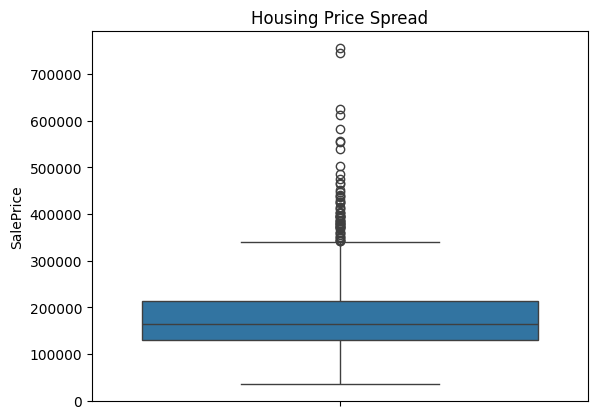

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [147]:
plt.title('Housing Price Spread')
sns.boxplot(y=housing.SalePrice)
plt.show()
print(housing.SalePrice.describe())

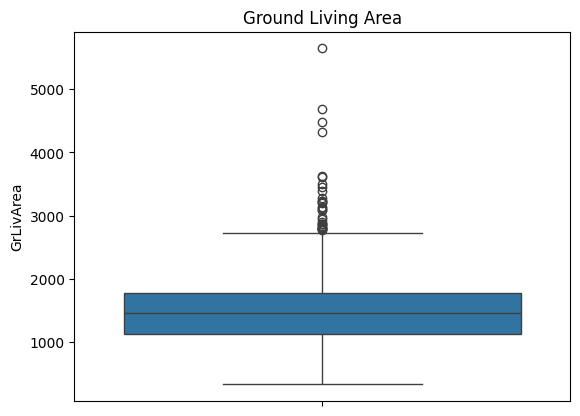

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


In [148]:
#boxplot of Ground Area
plt.title("Ground Living Area")
sns.boxplot(y=housing.GrLivArea)
plt.show()
print(housing.GrLivArea.describe())

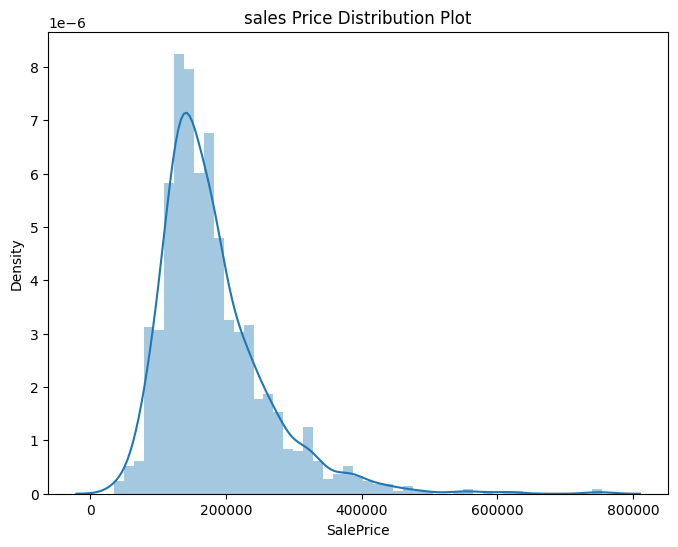

In [149]:
plt.figure(figsize=(8,6))
plt.title('sales Price Distribution Plot')
sns.distplot(housing.SalePrice)
plt.show()

### **<font color='darkblue'> Most of the house have prices between 100,000 to 300,000 </font>**

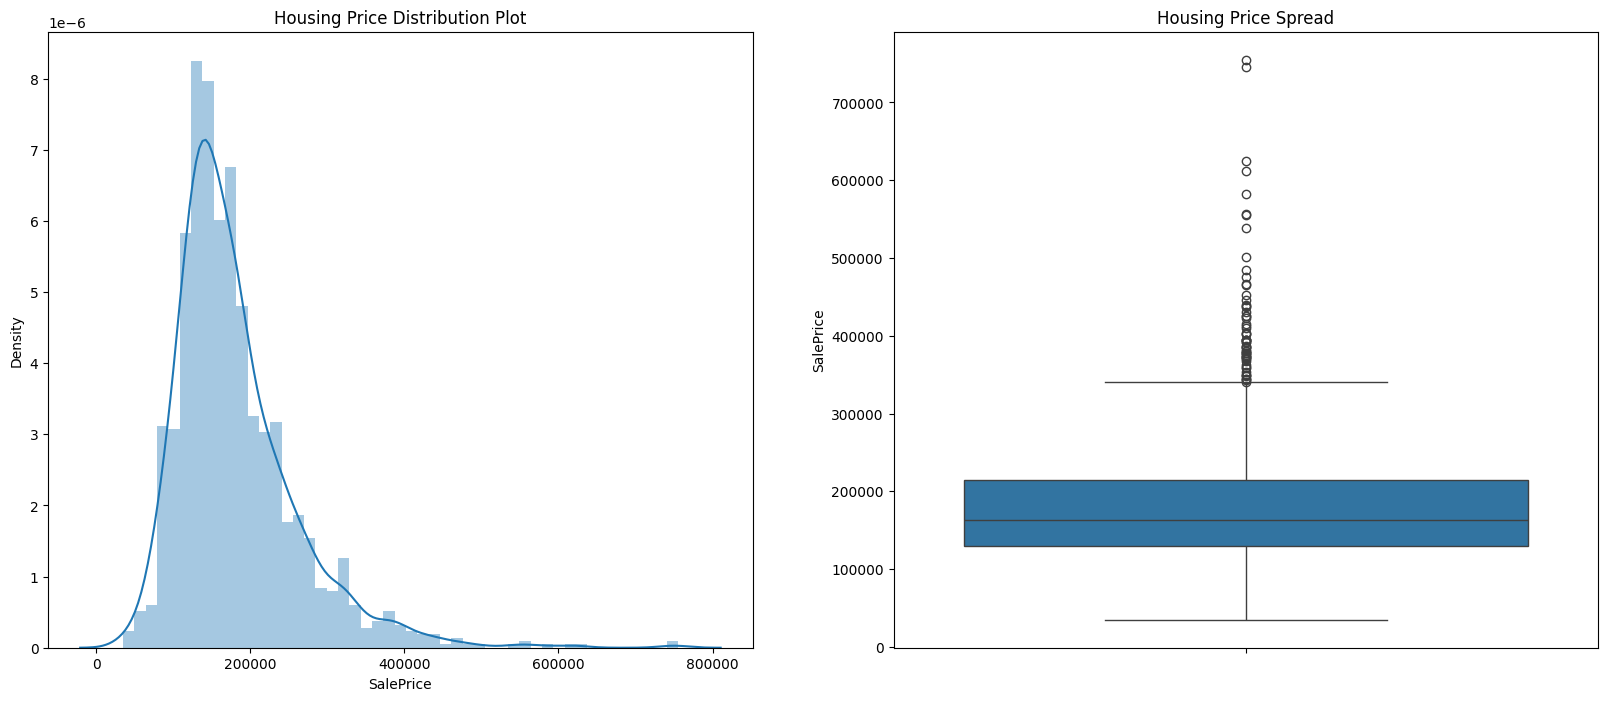

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [150]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Housing Price Distribution Plot')
sns.distplot(housing.SalePrice)

plt.subplot(1,2,2)
plt.title('Housing Price Spread')
sns.boxplot(y=housing.SalePrice)

plt.show()
print(housing.SalePrice.describe())

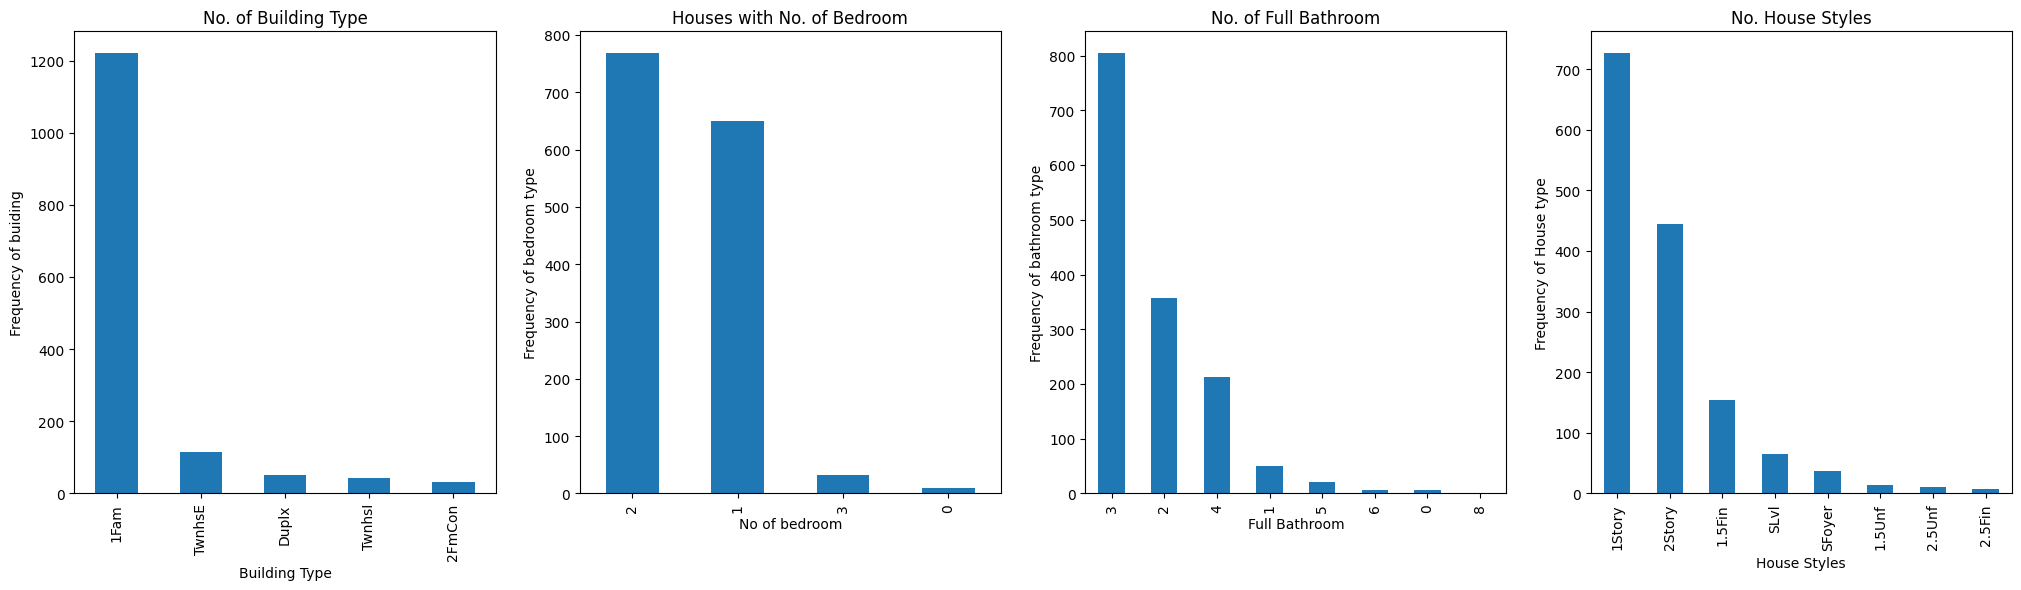

In [151]:
plt.figure(figsize=(25, 6))

plt.subplot(1,4,1)
plt1 = housing.BldgType.value_counts().plot(kind = 'bar')
plt.title('No. of Building Type')
plt1.set(xlabel = 'Building Type', ylabel='Frequency of buiding')

plt.subplot(1,4,2)
plt1 = housing.FullBath.value_counts().plot(kind ='bar')
plt.title('Houses with No. of Bedroom')
plt1.set(xlabel = 'No of bedroom', ylabel='Frequency of bedroom type')

plt.subplot(1,4,3)
plt1 = housing.BedroomAbvGr.value_counts().plot(kind ='bar')
plt.title('No. of Full Bathroom')
plt1.set(xlabel = 'Full Bathroom', ylabel='Frequency of bathroom type')

plt.subplot(1,4,4)
plt1 = housing.HouseStyle.value_counts().plot(kind ='bar')
plt.title('No. House Styles')
plt1.set(xlabel = 'House Styles', ylabel='Frequency of House type')
plt.show()

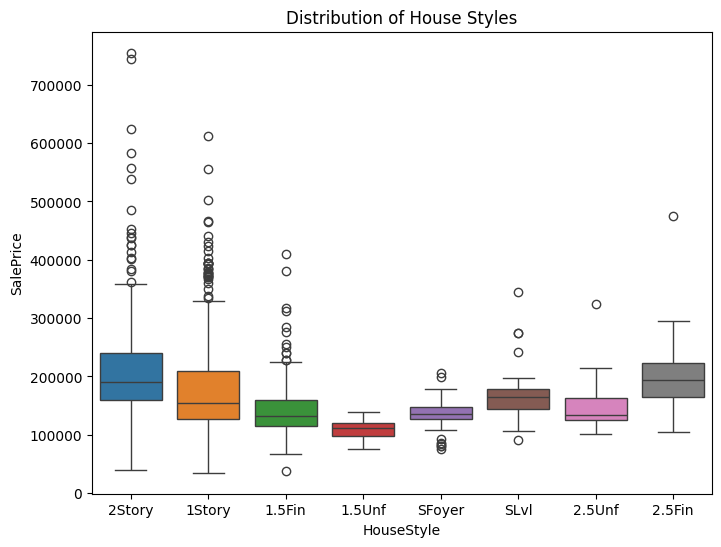

In [152]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=housing,x='HouseStyle', y='SalePrice', hue="HouseStyle",dodge=False)
title = plt.title('Distribution of House Styles')

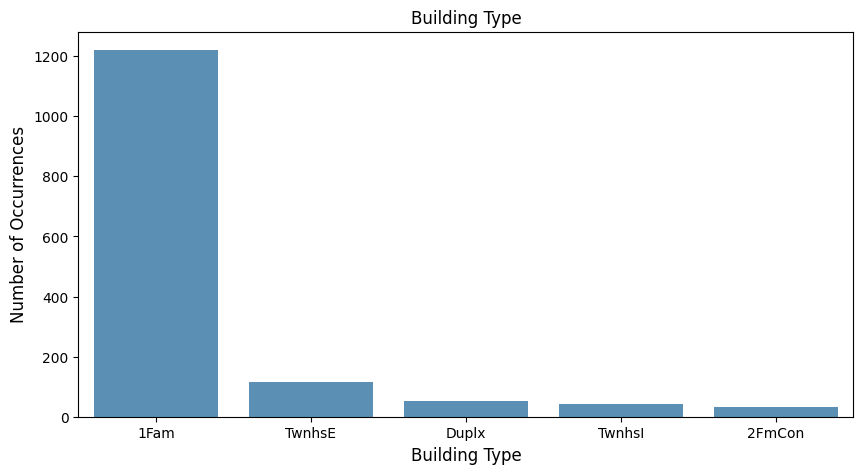

In [153]:
bldgtype  = housing['BldgType'].value_counts()
bldgtype = bldgtype[:10,] 
plt.figure(figsize=(10,5))
sns.barplot(x=bldgtype.index, y=bldgtype.values, alpha=0.8)
plt.title('Building Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Building Type', fontsize=12)
plt.show()

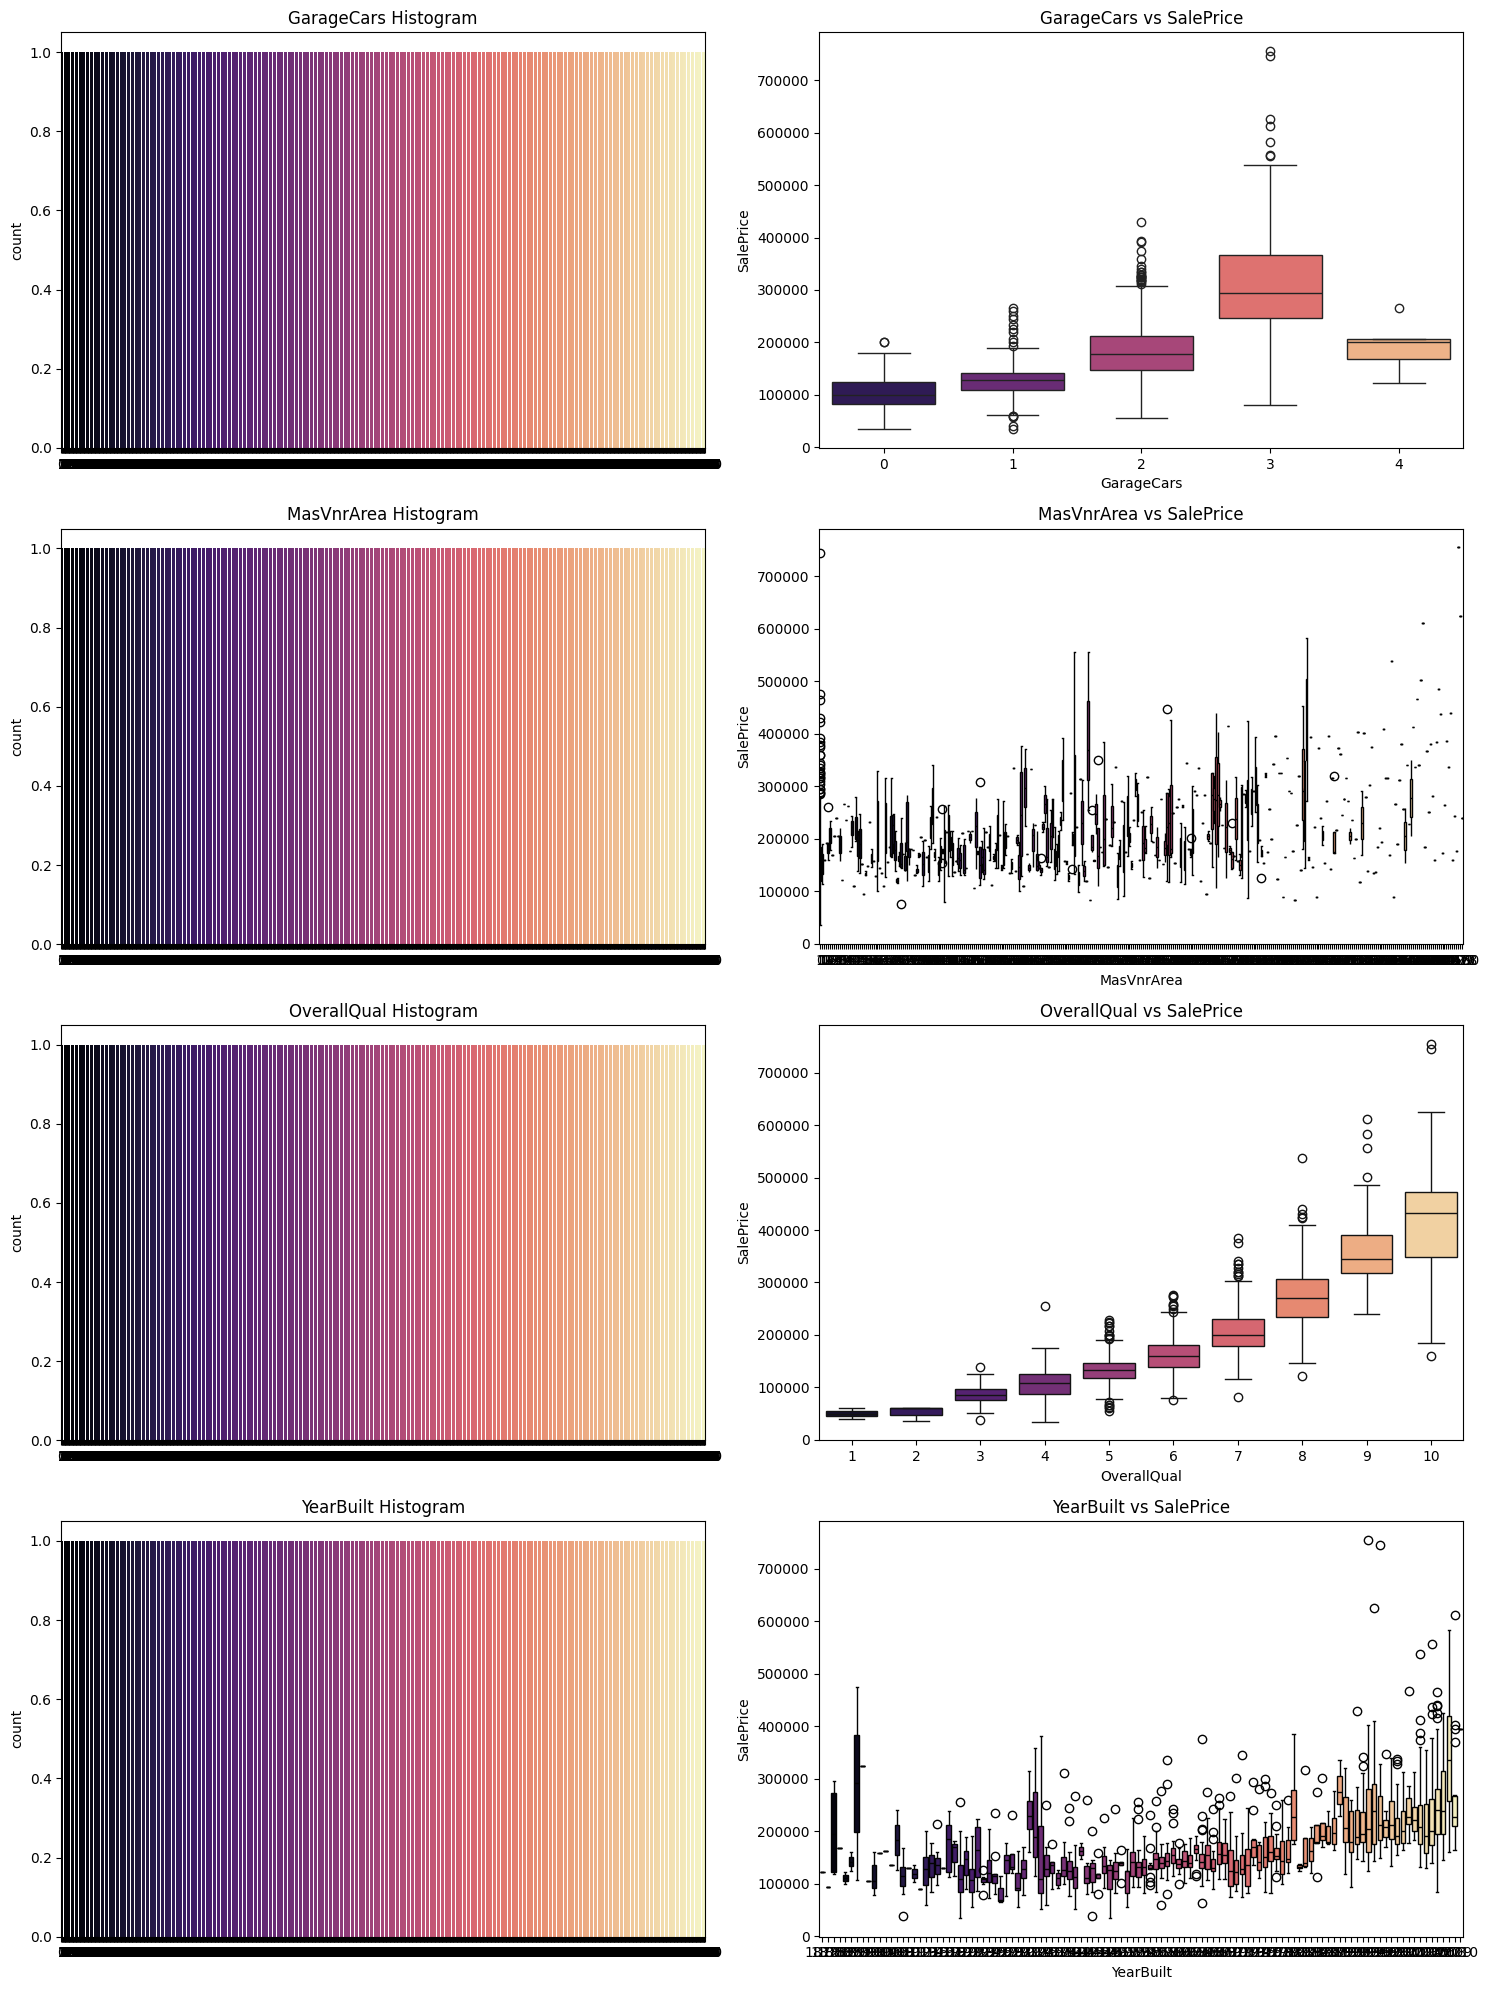

In [154]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(housing[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs SalePrice')
    sns.boxplot(x=housing[x], y=housing.SalePrice, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('GarageCars', 1)
plot_count('MasVnrArea', 3)
plot_count('OverallQual', 5)
plot_count('YearBuilt', 7)

plt.tight_layout()

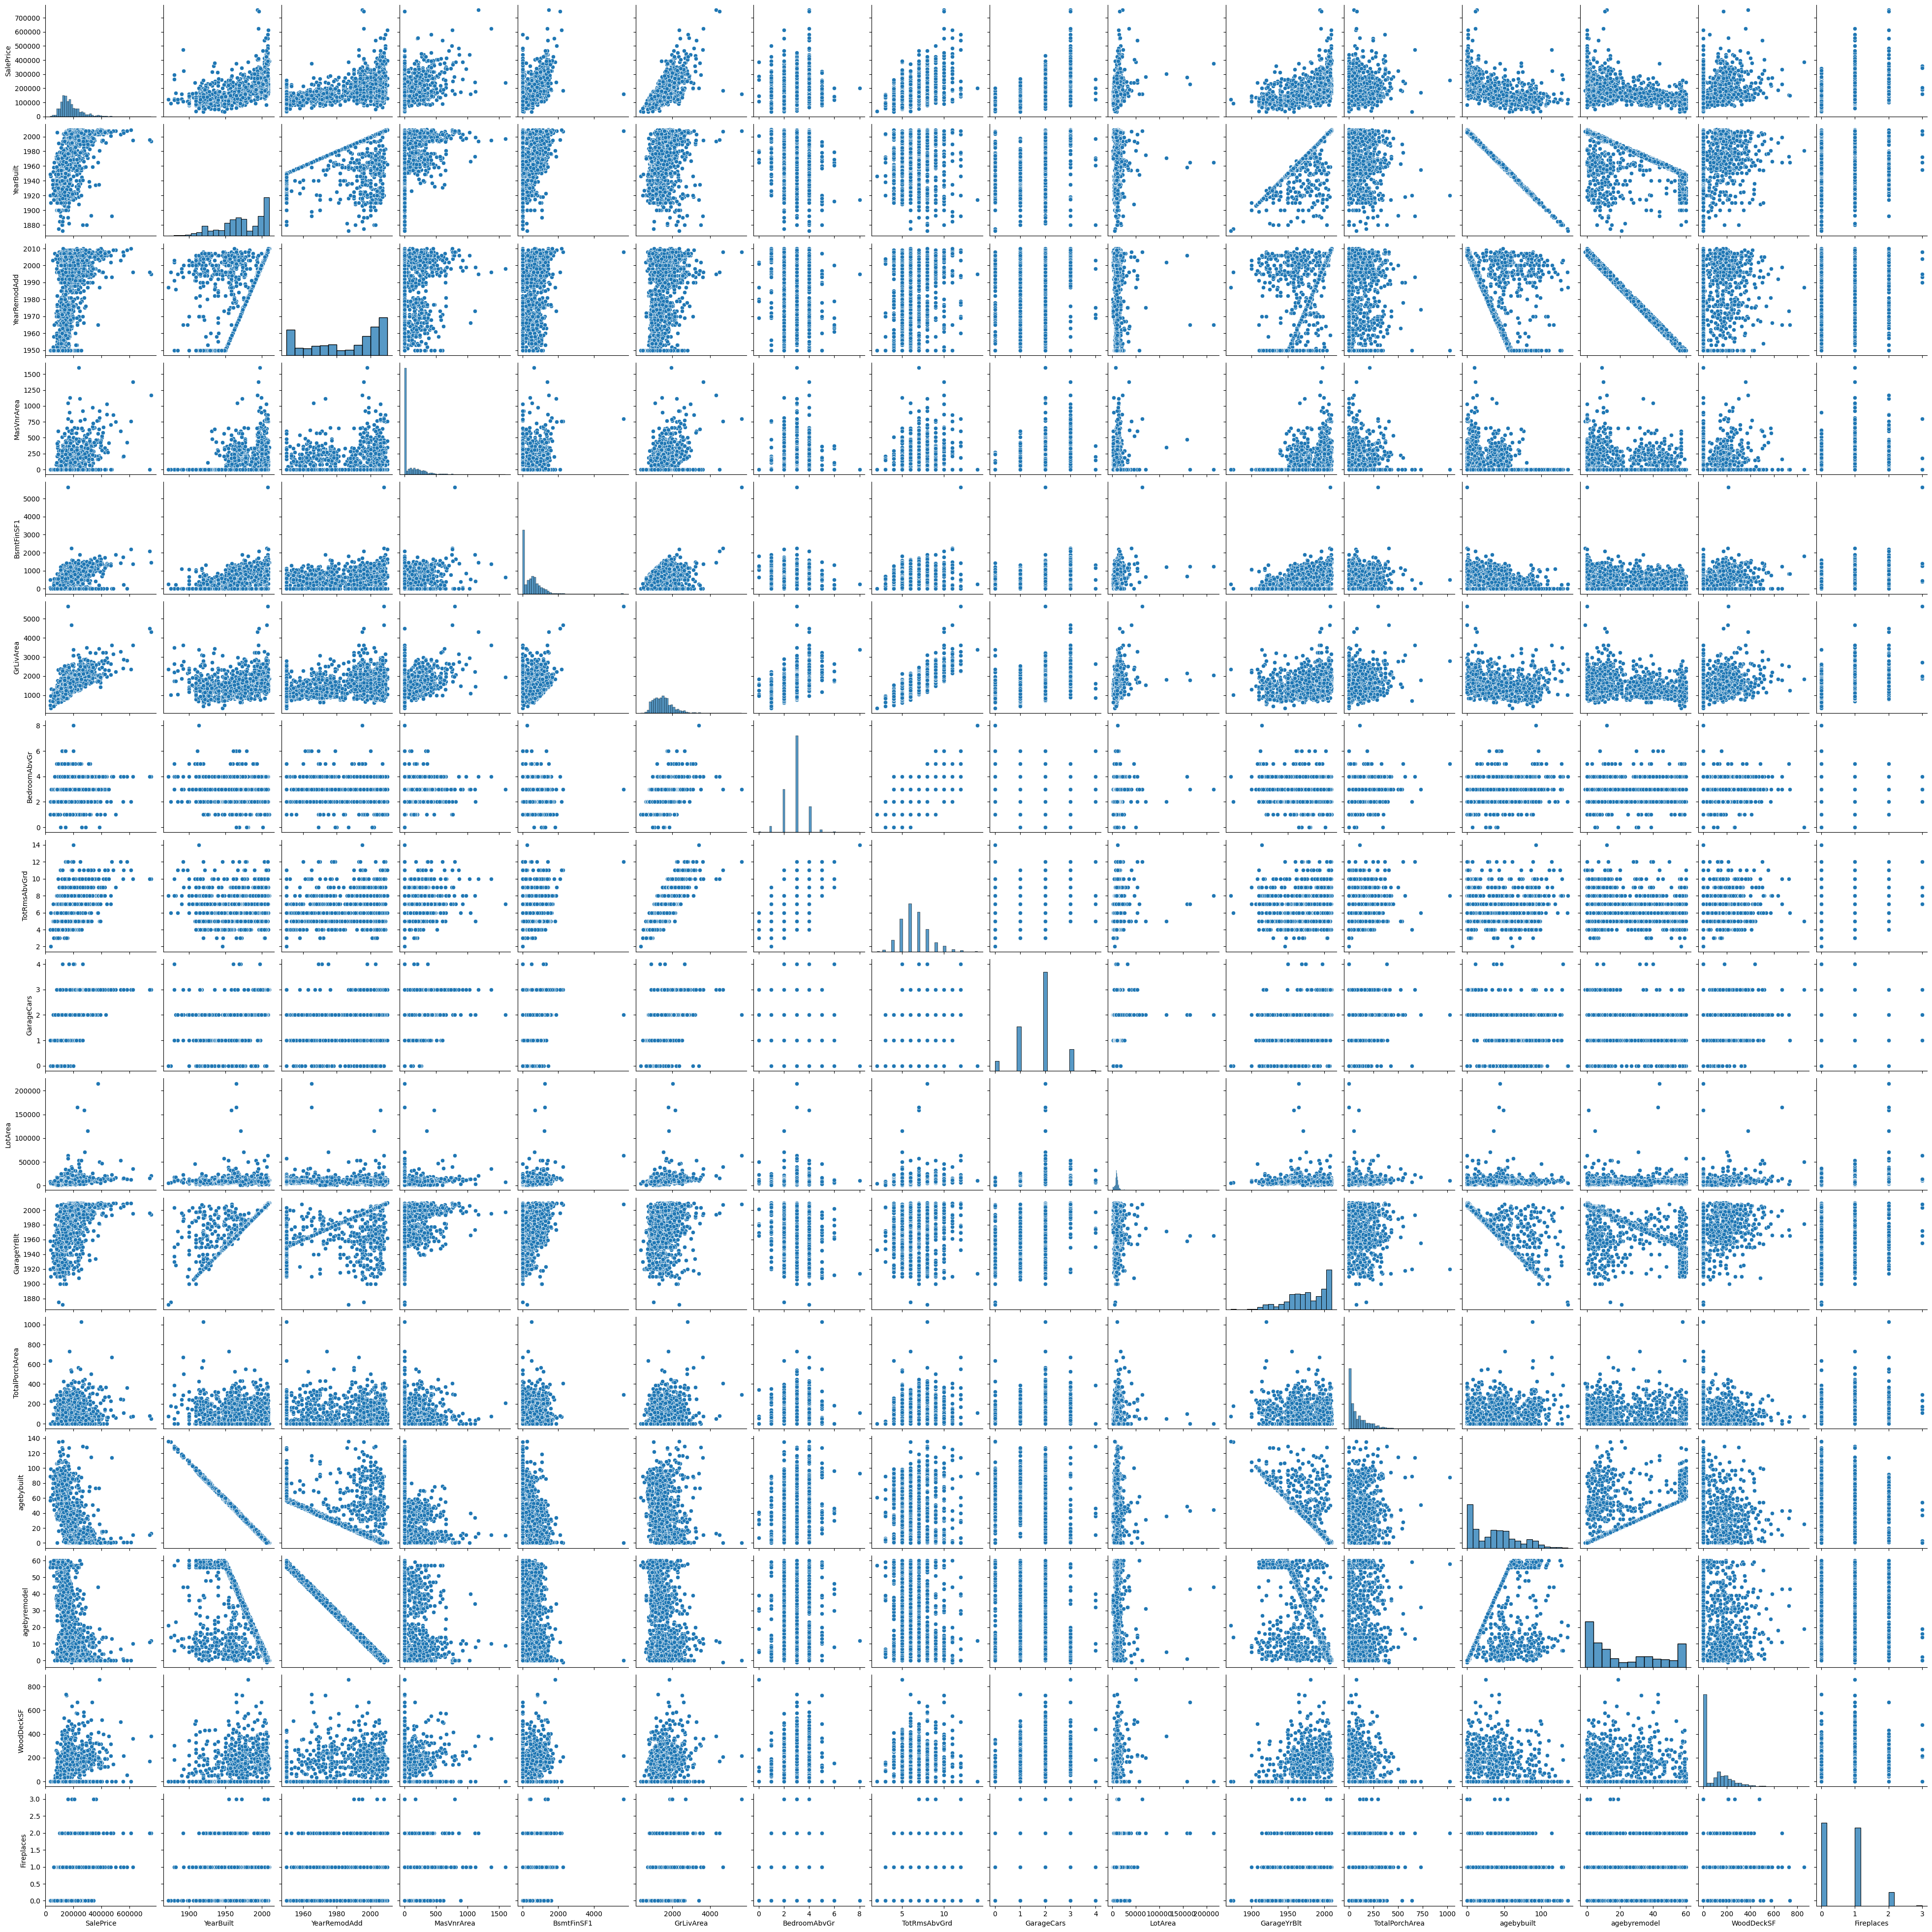

In [155]:
house_new = housing[['SalePrice', 'YearBuilt', 'YearRemodAdd','MasVnrArea', 'BsmtFinSF1','GrLivArea',
                  'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'LotArea', 'GarageYrBlt','TotalPorchArea', 
                     'agebybuilt','agebyremodel', 'WoodDeckSF','Fireplaces']]
house_new.head()
sns.pairplot(house_new)
plt.show()

In [ ]:
numeric_df = housing.select_dtypes(include=np.number)

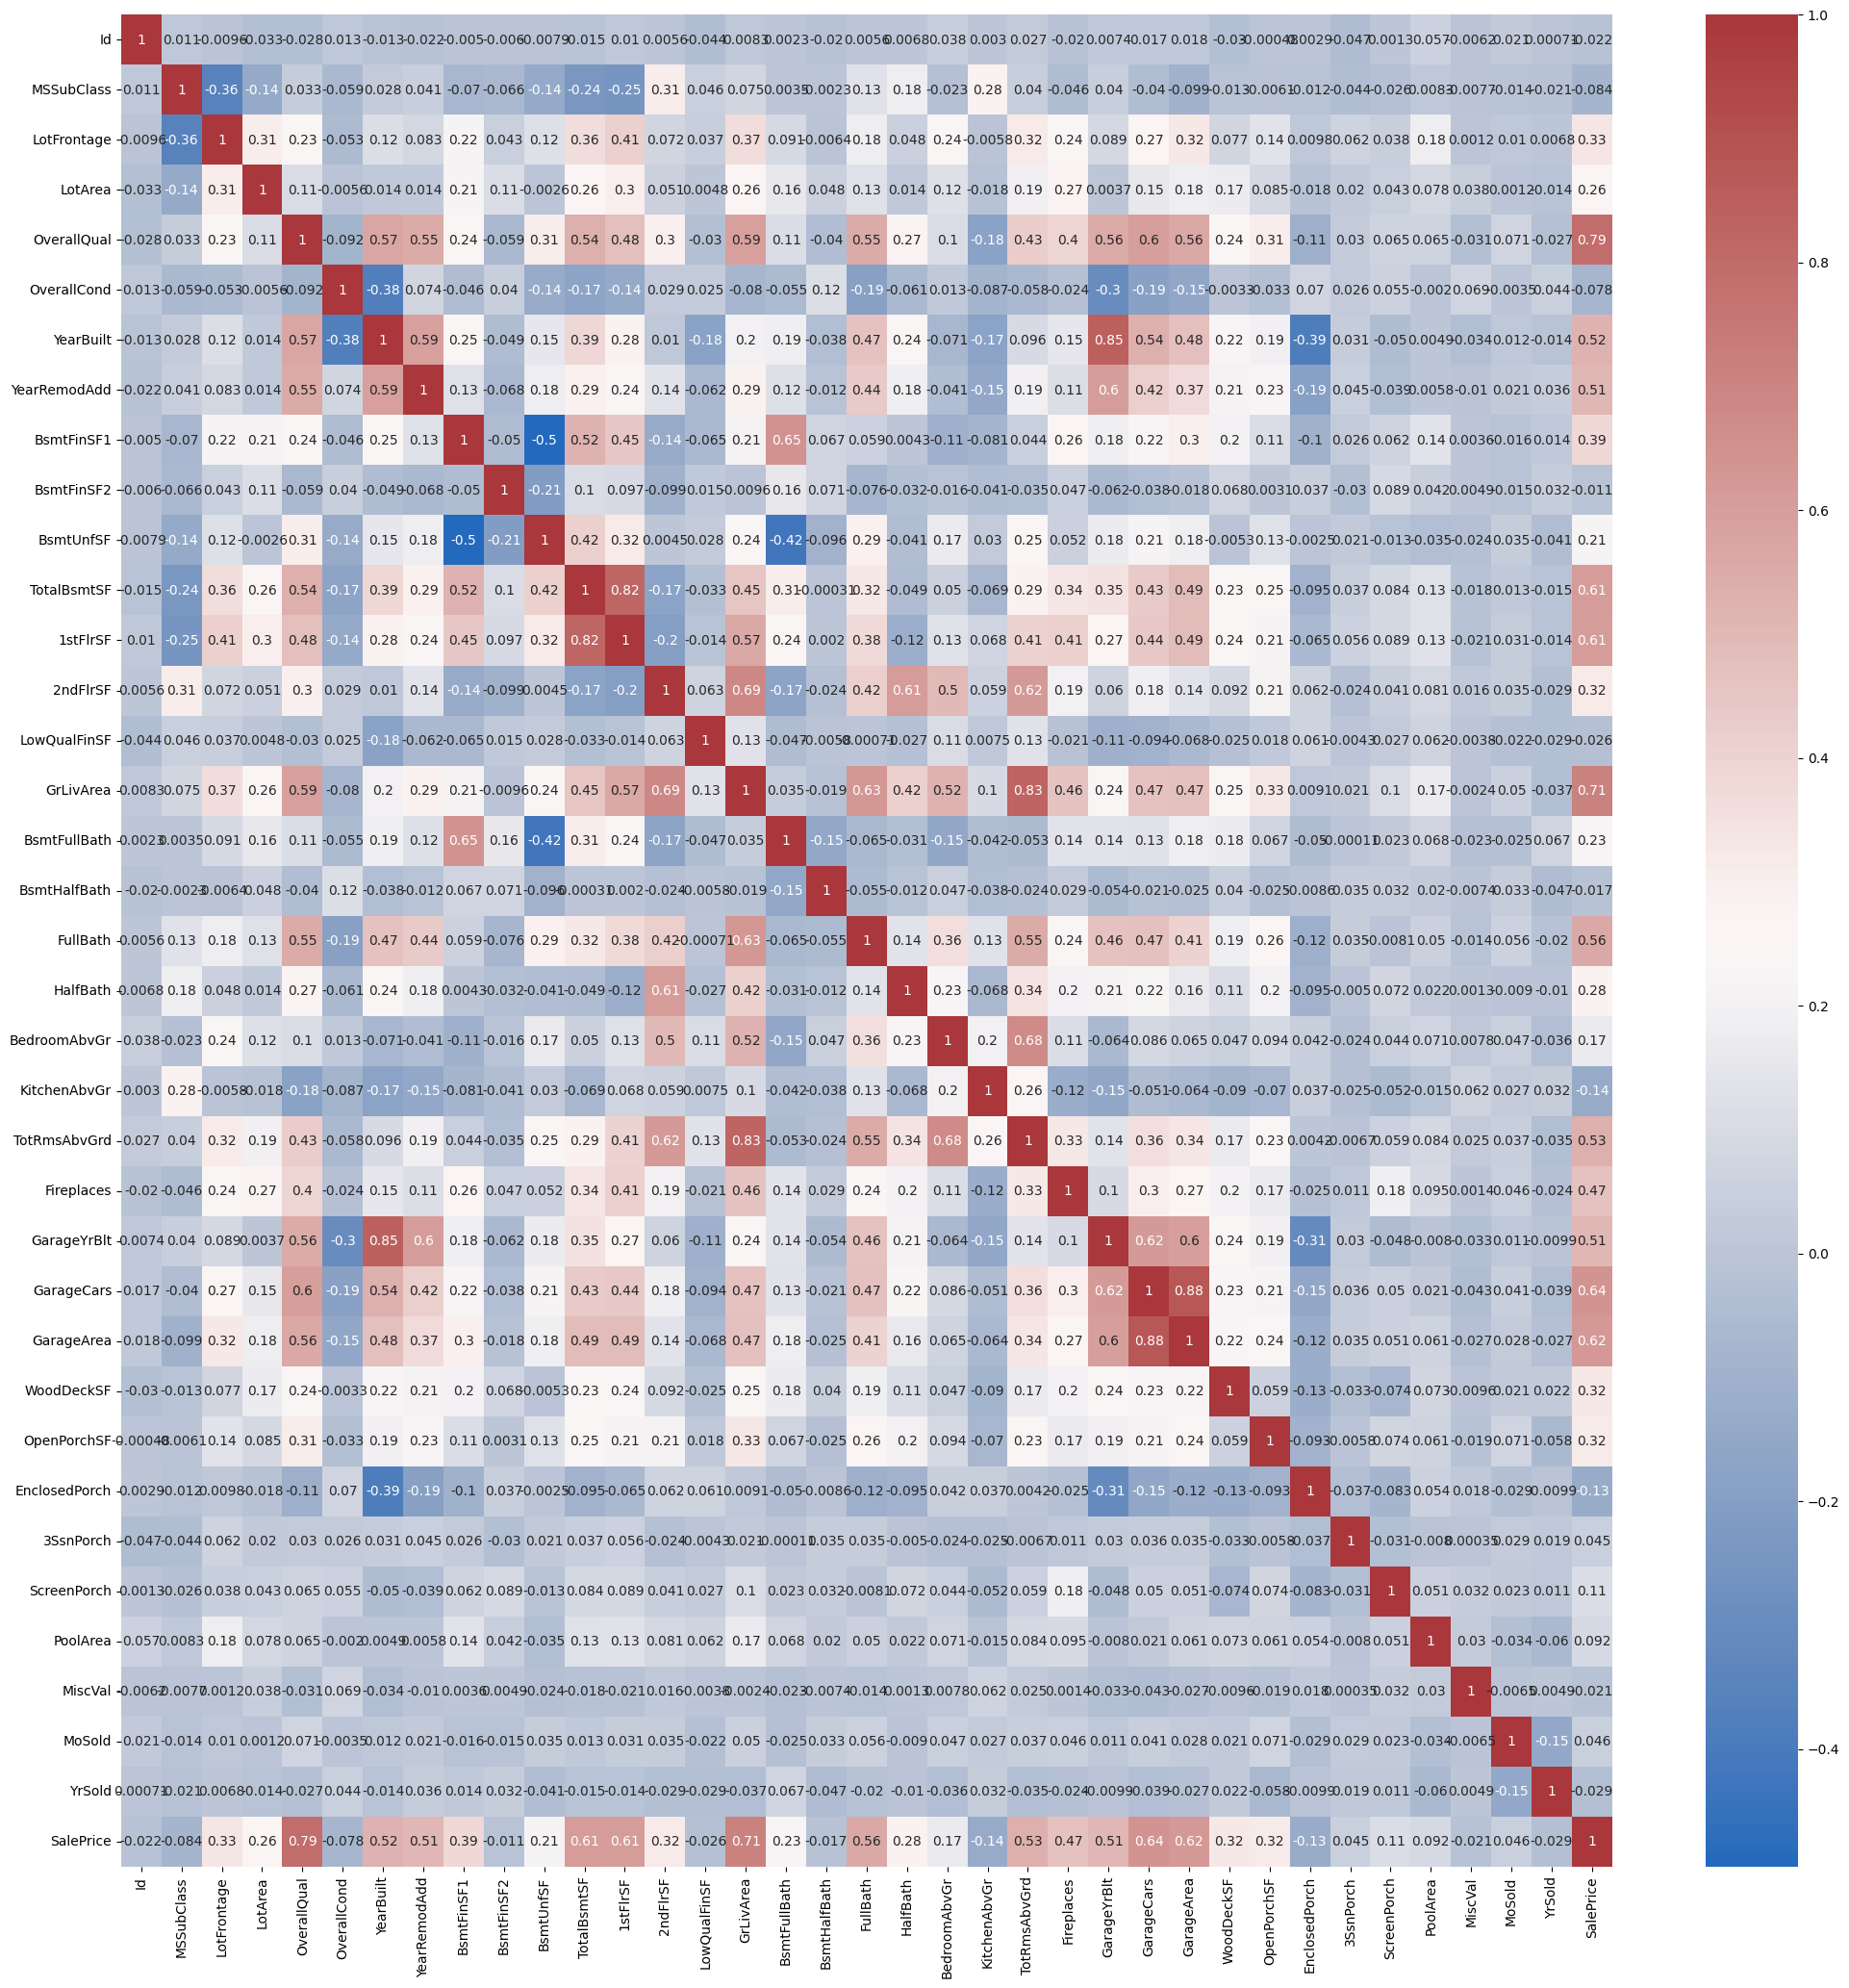

In [156]:
corrmat=numeric_df.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(25,25))
g=sns.heatmap(housing[top_corr_feature].corr(), annot=True,cmap="vlag")

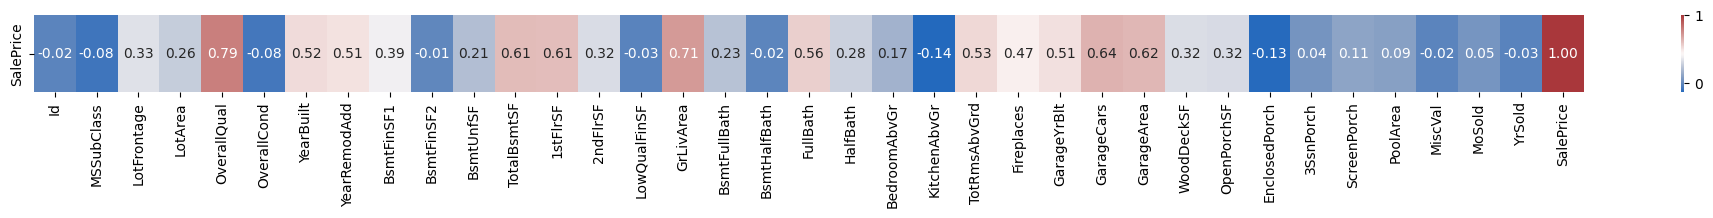

In [157]:
#correlation by salesprice
num = housing.select_dtypes(exclude = 'object')
numcorr = numeric_df.corr()
f, ax = plt.subplots(figsize = (25,1)) # set figure size
sns.heatmap(numcorr.sort_values(by = 'SalePrice', ascending = False).head(1), annot = True, fmt = ".2f",cmap="vlag")
plt.show()

In [158]:
housing.shape

(1460, 95)

In [159]:
#removing garage area for garage cars(0.64>0.62)
#removing OverallCond for low correlation with Salesprice
#removing BsmtFinSF2
#removing LowQualFinSF
#removing BsmtHalfBath
#removing EnclosedPorch
#removing 3SsnPorch
#removing ScreenPorch
housing=housing.drop("OverallCond",axis=1)
housing=housing.drop("GarageArea",axis=1)
housing=housing.drop("BsmtFinSF2",axis=1)
housing=housing.drop("LowQualFinSF",axis=1)
housing=housing.drop("BsmtHalfBath",axis=1)
housing=housing.drop("EnclosedPorch",axis=1)
housing=housing.drop("3SsnPorch",axis=1)
housing=housing.drop("ScreenPorch",axis=1)

In [160]:
numeric_df = housing.select_dtypes(include=np.number)

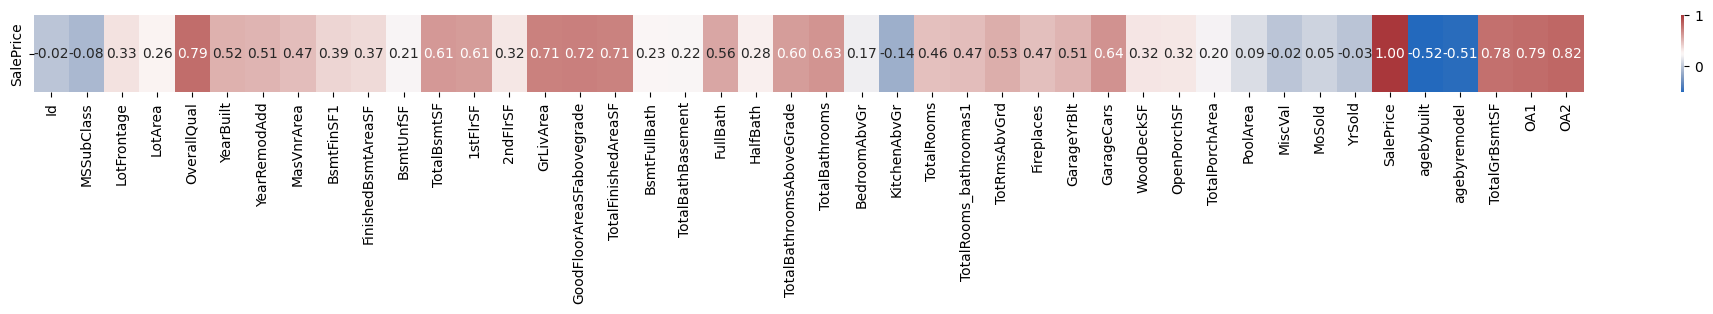

In [161]:
#correlation by salesprice
num = housing.select_dtypes(exclude = 'object')
numcorr = numeric_df.corr()
f, ax = plt.subplots(figsize = (25,1)) # set figure size
sns.heatmap(numcorr.sort_values(by = 'SalePrice', ascending = False).head(1), annot = True, fmt = ".2f",cmap="vlag")
plt.show()

In [162]:
housing=housing.drop("FinishedBsmtAreaSF",axis=1)
housing=housing.drop("FullBath",axis=1)
housing=housing.drop("HalfBath",axis=1)
housing=housing.drop("TotalBathBasement",axis=1)
housing=housing.drop("TotalRooms",axis=1)
housing=housing.drop("OA1",axis=1)

In [163]:
numeric_df = housing.select_dtypes(include=np.number)

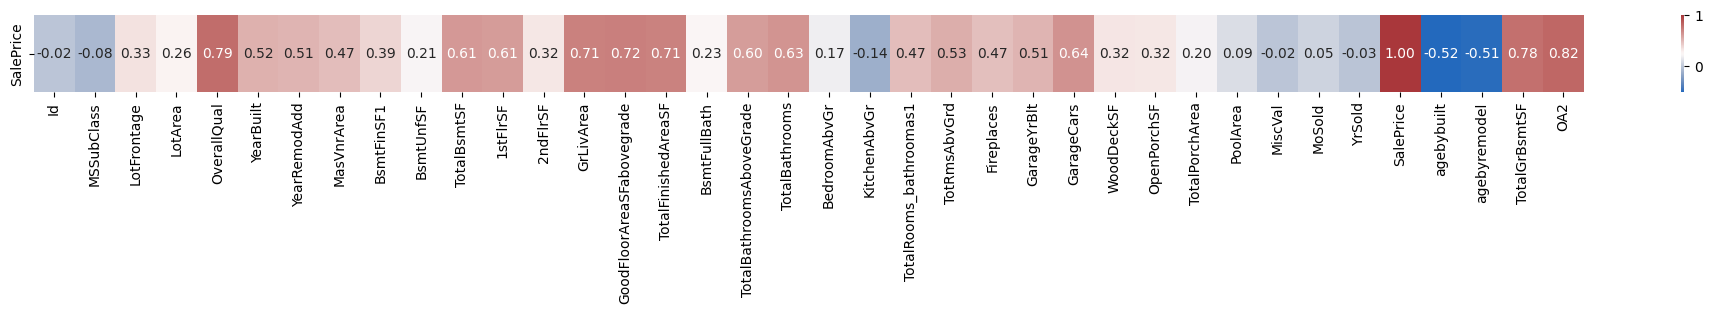

In [164]:
#correlation by salesprice
num = housing.select_dtypes(exclude = 'object')
numcorr = numeric_df.corr()
f, ax = plt.subplots(figsize = (25,1)) # set figure size
sns.heatmap(numcorr.sort_values(by = 'SalePrice', ascending = False).head(1), annot = True, fmt = ".2f",cmap="vlag")
plt.show()

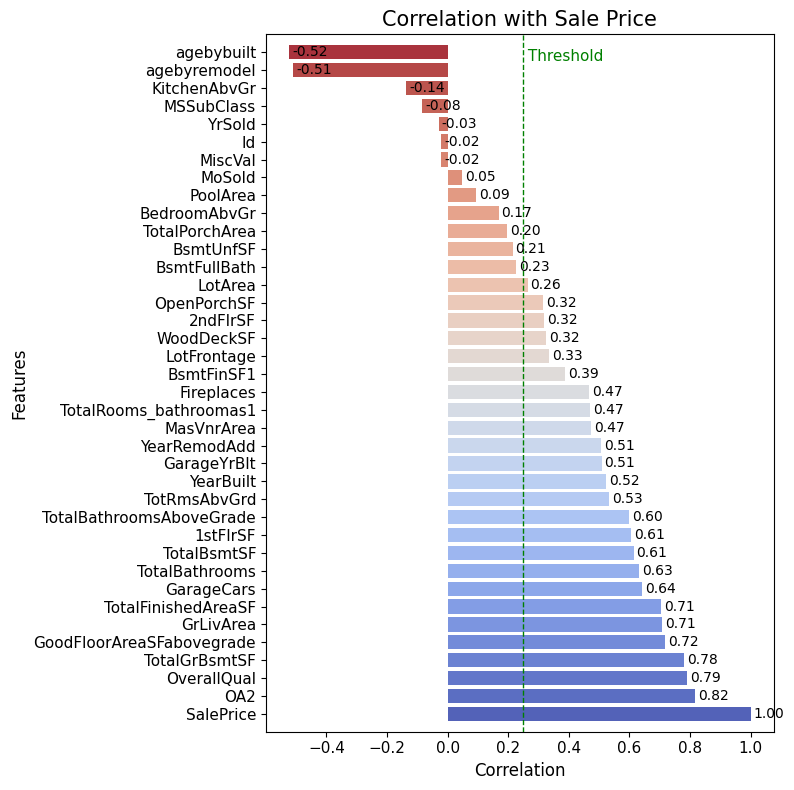

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort correlation values and create a bar plot
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
correlation_sorted = numcorr['SalePrice'].sort_values(ascending=False)
ax = sns.barplot(x=correlation_sorted.values, y=correlation_sorted.index, palette='coolwarm')

# Add a vertical line at 0.25
plt.axvline(x=0.25, color='green', linestyle='--', linewidth=1)
plt.text(0.25, len(correlation_sorted) - 1.5, ' Threshold', color='green', fontsize=11, ha='left')

# Add annotations
for i, val in enumerate(correlation_sorted.values):
    plt.text(val + 0.01, i, f'{val:.2f}', color='black', va='center')

# Customize plot aesthetics
plt.title('Correlation with Sale Price', fontsize=15)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.ylabel('Features', fontsize=12)
plt.xlabel('Correlation', fontsize=12)
plt.ylim(-1, len(correlation_sorted))  # Set y-axis limits to match number of features
plt.tight_layout()

plt.show()

In [166]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave    NA      Reg   
1   2          20       RL         80.0     9600   Pave    NA      Reg   
2   3          60       RL         68.0    11250   Pave    NA      IR1   
3   4          70       RL         60.0     9550   Pave    NA      IR1   
4   5          60       RL         84.0    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  YearBuilt  YearRemodAdd  \
0       Norm     1Fam     2Story            7       2003          2003   
1       Norm     1Fam     1Story            6       1976          1976   
2       Norm     1Fam     2Story            7       2001          2002   
3       Norm     1Fam     2Story            7       1915          1970   
4       Norm     1Fam     2Story            8       2000          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace         196        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None           0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace         162        Gd   
3     Gable  CompShg     Wd Sdng     WdShing       None           0        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace         350        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0         706          Unf        150          856    GasA        Ex   
1         978          Unf        284         1262    GasA        Ex   
2         486          Unf        434          920    GasA        Ex   
3         216          Unf        540          756    GasA        Gd   
4         655          Unf        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0          Y      SBrkr       856       854       1710   
1          Y      SBrkr      1262         0       1262   
2          Y      SBrkr       920       866       1786   
3          Y      SBrkr       961       756       1717   
4          Y      SBrkr      1145      1053       2198   

   GoodFloorAreaSFabovegrade  TotalFinishedAreaSF  BsmtFullBath  \
0                       1710                 2416             1   
1                       1262                 2240             0   
2                       1786                 2272             1   
3                       1717                 1933             1   
4                       2198                 2853             1   

   TotalBathroomsAboveGrade  TotalBathrooms  BedroomAbvGr  KitchenAbvGr  \
0                       2.5             3.5             3             1   
1                       2.0             2.5             3             1   
2                       2.5             3.5             3             1   
3                       1.0             2.0             3             1   
4                       2.5             3.5             4             1   

  KitchenQual  TotalRooms_bathroomas1  TotRmsAbvGrd Functional  Fireplaces  \
0          Gd                       8             8        Typ  

In [167]:
housing.shape

(1460, 81)

In [168]:
dfcheckpoint2=housing

In [169]:
dfcheckpoint2.to_excel("cleaneddata_cp2.xlsx", index=False)

In [170]:
dfcheckpoint3=housing

In [171]:
dfcheckpoint3.to_excel("Historic_clean.xlsx", index=False)

In [172]:
housing.describe(include='object').T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley          1460      3       NA  1369
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    Names   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1460      4     None   872
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1460      5       TA   649
BsmtCond       1460      5       TA  1311
BsmtExposure   1460      5       No   953
BsmtFinType1   1460      7      Unf   430
BsmtFinType2   1460      7      Unf  1257
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1460      5    SBrkr  1335
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu    1460      6       NA   690
GarageType     1460      7   Attchd   870
GarageFinish   1460      4      Unf   605
GarageQual     1460      6       TA  1311
GarageCond     1460      6       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC         1460      4       NA  1453
Fence          1460      5       NA  1179
MiscFeature    1460      5       NA  1406
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198